In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
DPI=300
FONTSIZE=20

from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42


import seaborn as sns
custom_params = {"font.size": FONTSIZE, "figure.dpi": 100, "savefig.dpi": DPI}
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/")
DIR2SAVE.mkdir(parents=True, exist_ok=True)

FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [3]:
### Get primary DEGs for each cell type/cancer cell state from sam's file
degs = pd.read_excel('/data/BCI-CRC/SO/data/CRC_multiome/ArchR_final_analysis/DEGs/primaryAllCells_DEGs_seurat_wilcoxon.xlsx',
                     sheet_name=None,
                    )

In [4]:
degs.keys()

dict_keys(['ipEMT', 'Stem (NOTUM high)', 'pEMT', 'HLA high', 'Stem', 'Colonocyte', 'Intermediate', 'TA2', 'Hypoxia', 'UPR', 'Tuft', 'TA1', 'Goblet', 'Enteroendocrine', 'Plasma', 'Myeloid cycling', 'Treg HSP', 'GREM1 HSP CAF', 'Stalk-like endo', 'Tip-like endo', 'CXCL14 BMP CAF', 'Lymphatic endo', 'Pericyte', 'Endo cycling', 'Myofibroblast', 'Stromal cycling', 'MMP CAF', 'SMC', 'C3 iCAF', 'Enteric glial', 'HSP Mono', 'NLRP3 Mac', 'C1QC Mac', 'FCN1 Mono', 'SPP1 Mac', 'pDC', 'cDC2', 'IL1B Mac', 'migDC', 'FCGR3A Mono', 'PLTP LYVE1 Mac', 'Neutrophil', 'B', 'Treg', 'CD4 Th', 'CD8 Tex', 'CD4 Tfh', 'CD4 Tn', 'CD8 Tem', 'CD8 Tem HSP', 'CD4 Th HSP', 'T cycling', 'CD4 Th17', 'gdT', 'NK2', 'NKT', 'NK1', 'ILC3', 'Mast', 'cDC1'])

In [5]:
# nb of genes per cell type 
nb_genes_per_celltype = [len(i) for k,i in degs.items() ]

In [6]:
nb_genes_per_celltype

[6801,
 5706,
 7684,
 6164,
 6318,
 6590,
 6525,
 2122,
 4436,
 4864,
 2928,
 6160,
 7237,
 7121,
 351,
 2055,
 65,
 1946,
 1194,
 1320,
 1191,
 1174,
 1141,
 2622,
 1865,
 3819,
 2915,
 514,
 1313,
 494,
 168,
 490,
 985,
 170,
 712,
 343,
 650,
 845,
 351,
 517,
 366,
 78,
 54,
 97,
 39,
 86,
 68,
 44,
 45,
 60,
 63,
 521,
 107,
 87,
 43,
 40,
 50,
 53,
 115,
 945]

### TODO: plot distribution of nb genes per cell type / cancer cell state to fix the treshold: + loook at genes of that tthreshold o see if capture correctly the singature 

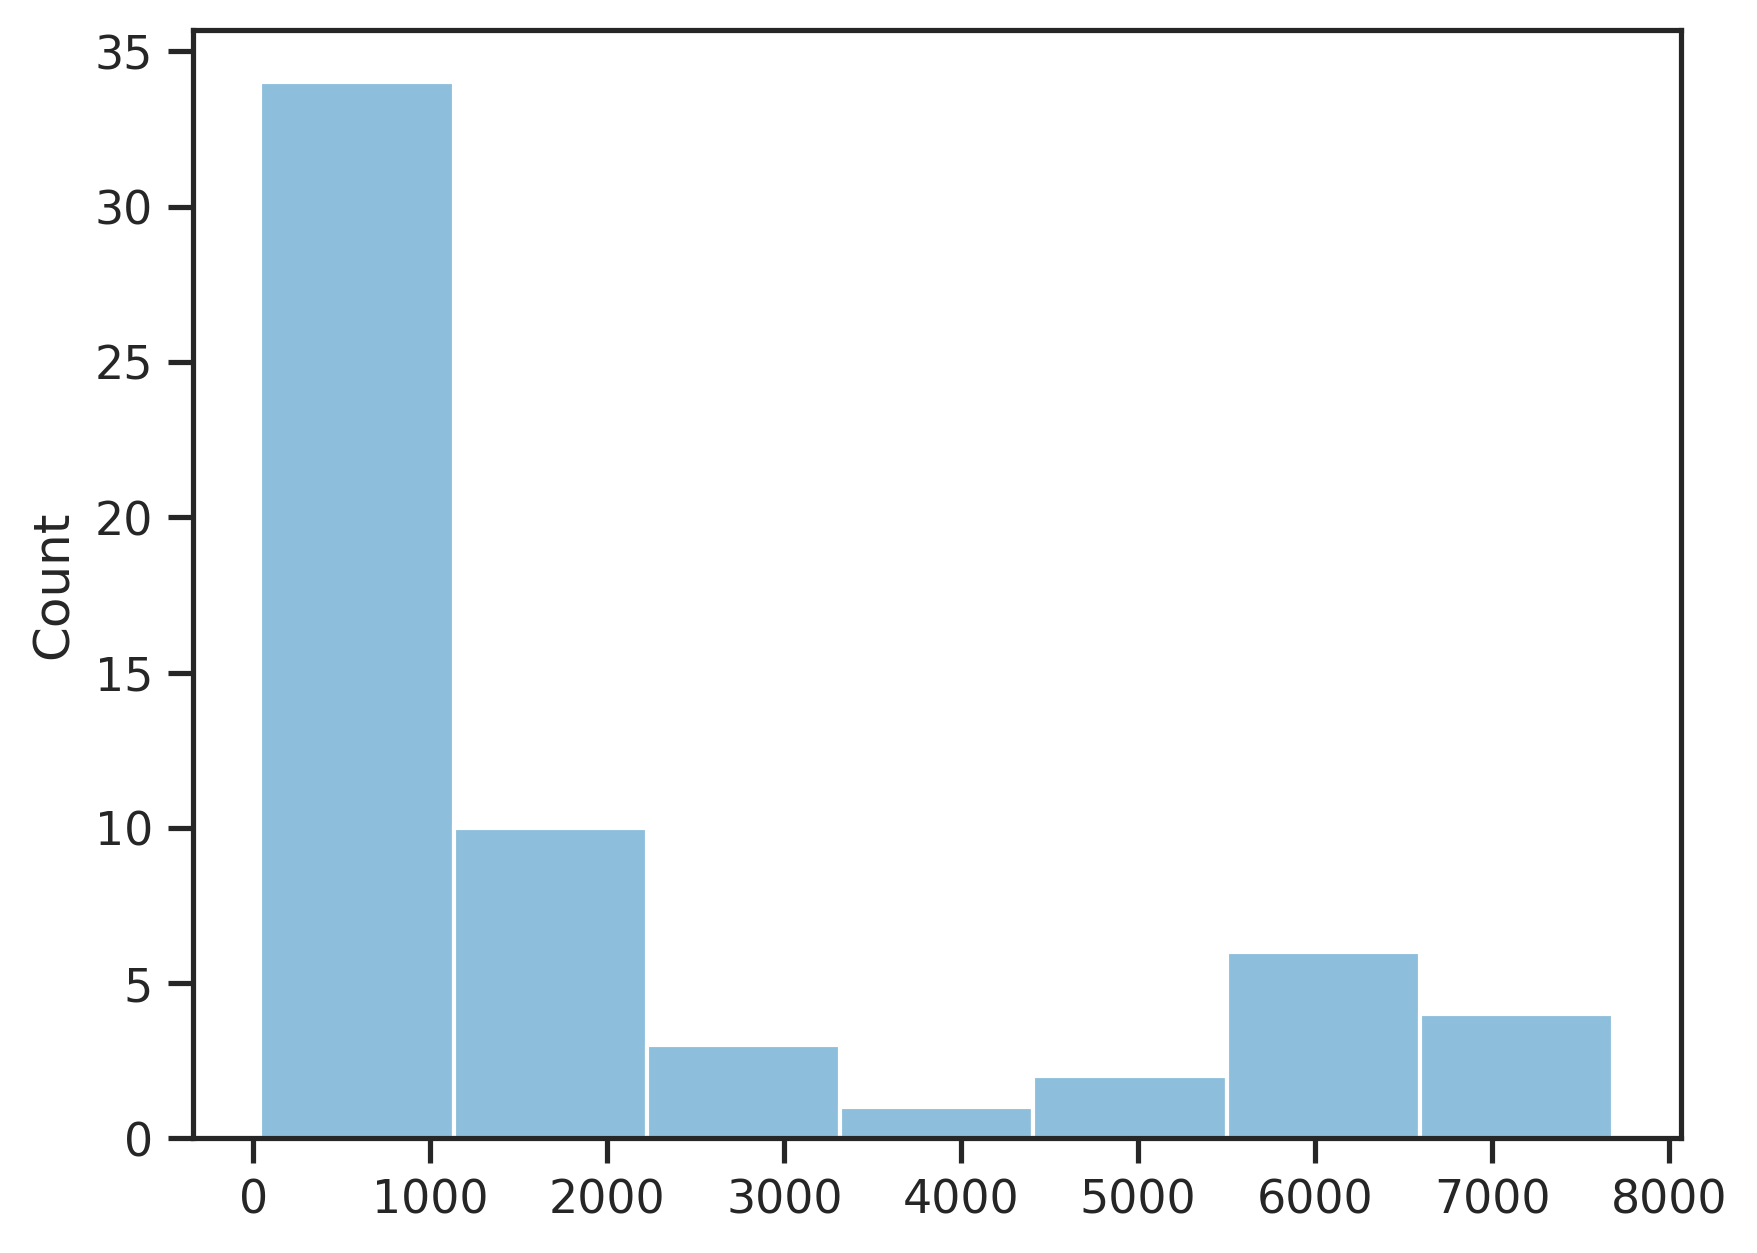

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=DPI)
sns.histplot(nb_genes_per_celltype, color="#67A9CF", ax=ax)

fig.savefig(FIG2SAVE.joinpath(f"TCGA_distribution_nb_DE_genes_celltype_to_find_threshold_DE_genes.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [8]:
pd.Series(nb_genes_per_celltype).describe()

count      60.000000
mean     1880.450000
std      2410.852838
min        39.000000
25%        94.500000
50%       681.000000
75%      2695.250000
max      7684.000000
dtype: float64

In [9]:
# read in tcga data: columns = patients, index = gene names but ensmeble and last column = Gene Name
tcga_exp = pd.read_parquet("/data/BCI-CRC/SO/data/public/TCGA/COADREAD_TPonly_uniquePatients_zscore.parquet")
tcga_exp.head(3)

TCGA-A6-5664  TCGA-D5-6530  TCGA-AA-3556  TCGA-AA-3818  \
index                                                                        
ENSG00000000003.15     -0.947482     -1.552415     -0.133085      0.828211   
ENSG00000000005.6      -0.785193     -1.310053      0.037304      1.405941   
ENSG00000000419.13     -1.324709     -1.237521      0.312150     -0.289543   

                    TCGA-AA-3660  TCGA-DM-A28G  TCGA-AA-3976  TCGA-G4-6307  \
index                                                                        
ENSG00000000003.15      0.107183      0.153849      1.481817      0.660882   
ENSG00000000005.6      -0.639623      0.737881      0.820617      0.025309   
ENSG00000000419.13      0.143101     -0.607545      1.398614     -0.099116   

                    TCGA-AA-3522  TCGA-AA-3530  ...  TCGA-CI-6623  \
index                                           ...                 
ENSG00000000003.15      0.417695      0.984411  ...      0.701069   
ENSG00000000005.6       0.176256      0.151691  ...     -0.329749   
ENSG00000000419.13     -0.050033      0.434238  ...      1.943809   

                    TCGA-AH-6643  TCGA-DY-A0XA  TCGA-AH-6897  TCGA-AH-6903  \
index                                                                        
ENSG00000000003.15     -0.348427      0.874687      0.443539      0.823830   
ENSG00000000005.6      -1.598067     -0.170324      2.777399     -1.088029   
ENSG00000000419.13     -0.145974      0.930454      0.489420      0.062678   

                    TCGA-AG-3609  TCGA-AG-3605  TCGA-AG-3894  TCGA-AG-3574  \
index                                                                        
ENSG00000000003.15      0.613325      1.677158      0.328236      1.686084   
ENSG00000000005.6       0.225478     -1.175697     -0.014784     -0.730985   
ENSG00000000419.13      1.145744      0.081625     -0.456520      0.793907   

                      Gene  
index                       
ENSG00000000003.15  TSPAN6  
ENSG00000000005.6     TNMD  
ENSG00000000419.13    DPM1  

[3 rows x 610 columns]

In [10]:
tcga_exp.sum(axis=0)

TCGA-A6-5664                                          4414.841146
TCGA-D5-6530                                         -3228.777817
TCGA-AA-3556                                         -7186.682956
TCGA-AA-3818                                         -5326.368748
TCGA-AA-3660                                          -934.051207
                                      ...                        
TCGA-AG-3609                                           -2641.3131
TCGA-AG-3605                                          1362.342174
TCGA-AG-3894                                         -6761.386292
TCGA-AG-3574                                         -5693.996896
Gene            TSPAN6TNMDDPM1SCYL3C1orf112FGRCFHFUCA2GCLCNFYA...
Length: 610, dtype: object

In [11]:
tcga_exp.iloc[:,:-1].sum(axis=1)

index
ENSG00000000003.15   -2.415845e-13
ENSG00000000005.6    -2.451372e-13
ENSG00000000419.13    1.623590e-12
ENSG00000000457.14    8.633094e-13
ENSG00000000460.17   -1.811884e-13
                          ...     
ENSG00000288669.1     4.916956e-12
ENSG00000288670.1     8.659740e-13
ENSG00000288671.1     0.000000e+00
ENSG00000288674.1    -3.197442e-14
ENSG00000288675.1    -1.170619e-12
Length: 60660, dtype: float64

### we want to look at correlations between cell type signatures across TCGA data

We use TCGA expression to calculate cell type/cancer cell state scores. We processed the gene expression matrix by log-transforming and centralizing. Gene scores of each metaprogramme were calculated as the average expression of genes in the specific programme. TCGA samples with records of age, gender, stage, survival data and tumour purity information were further used for survival analysis. 

In [12]:
# let's try taking top 30 genes per cell type and cancer cell state
genes2consider = 40 #40 #50 #39 #30

In [13]:
# build a dataframe of the top nb genes2consider DE genes per celltype we use for building a signature
signatures_df = pd.DataFrame({k:v['gene'][:genes2consider] for k,v in degs.items()})
signatures_df.to_excel(DIR2SAVE.joinpath(f"signatures_{genes2consider}_DE_genes_celltypes_for_TCGA.xlsx"))

In [14]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt')

In [15]:
tcga_scores = dict()
for k in degs.keys():
    # each TCGA patient has a score associated with the signature k
    # score compute of the average expressin of genes in the signature k
    tcga_scores[k] = tcga_exp[tcga_exp.Gene.isin(degs[k]['gene'][:genes2consider])].iloc[:, :-1].mean(axis=0)

In [16]:
tcga_scores

{'ipEMT': TCGA-A6-5664   -0.093603
 TCGA-D5-6530    0.305829
 TCGA-AA-3556    0.588485
 TCGA-AA-3818    0.083888
 TCGA-AA-3660   -0.005761
                   ...   
 TCGA-AH-6903   -0.339971
 TCGA-AG-3609    0.401739
 TCGA-AG-3605    0.273391
 TCGA-AG-3894   -0.279439
 TCGA-AG-3574   -0.184580
 Length: 609, dtype: float64,
 'Stem (NOTUM high)': TCGA-A6-5664   -0.060937
 TCGA-D5-6530   -0.323196
 TCGA-AA-3556   -0.071062
 TCGA-AA-3818    0.429020
 TCGA-AA-3660    0.296532
                   ...   
 TCGA-AH-6903    0.174560
 TCGA-AG-3609    0.455092
 TCGA-AG-3605    0.530695
 TCGA-AG-3894    0.545993
 TCGA-AG-3574    0.828503
 Length: 609, dtype: float64,
 'pEMT': TCGA-A6-5664   -0.059566
 TCGA-D5-6530   -0.367700
 TCGA-AA-3556    0.150522
 TCGA-AA-3818    0.391707
 TCGA-AA-3660   -0.110574
                   ...   
 TCGA-AH-6903   -0.291164
 TCGA-AG-3609    0.243753
 TCGA-AG-3605    0.232128
 TCGA-AG-3894    0.345588
 TCGA-AG-3574    0.147020
 Length: 609, dtype: float64,
 'HLA high': T

In [17]:
tcga_score_df = pd.DataFrame(tcga_scores)
tcga_score_df.head(3)

ipEMT  Stem (NOTUM high)      pEMT  HLA high      Stem  \
TCGA-A6-5664 -0.093603          -0.060937 -0.059566 -0.094452 -0.435695   
TCGA-D5-6530  0.305829          -0.323196 -0.367700  0.237185 -0.753243   
TCGA-AA-3556  0.588485          -0.071062  0.150522  0.491031 -0.106977   

              Colonocyte  Intermediate       TA2   Hypoxia       UPR  ...  \
TCGA-A6-5664   -0.097174      0.180858 -0.077456 -0.121320 -0.123419  ...   
TCGA-D5-6530    0.000049     -0.302152 -0.176317 -0.044973 -0.103939  ...   
TCGA-AA-3556    0.497113     -0.140799  0.104906  0.493680 -0.250704  ...   

              CD4 Th HSP  T cycling  CD4 Th17       gdT       NK2       NKT  \
TCGA-A6-5664    0.405806   0.660779  0.871134  0.499163  0.528541  0.495061   
TCGA-D5-6530    0.023531   0.848850  0.551092  0.930088  0.781798  0.775108   
TCGA-AA-3556   -0.233017  -0.330127 -0.348017 -0.240694 -0.078416 -0.063583   

                   NK1      ILC3      Mast      cDC1  
TCGA-A6-5664  0.537049  0.620101  1.022834  0.707289  
TCGA-D5-6530  0.671830  0.249812 -0.329084  0.106263  
TCGA-AA-3556 -0.160326 -0.131043  0.208979  0.126422  

[3 rows x 60 columns]

In [18]:
tcga_score_df.columns

Index(['ipEMT', 'Stem (NOTUM high)', 'pEMT', 'HLA high', 'Stem', 'Colonocyte',
       'Intermediate', 'TA2', 'Hypoxia', 'UPR', 'Tuft', 'TA1', 'Goblet',
       'Enteroendocrine', 'Plasma', 'Myeloid cycling', 'Treg HSP',
       'GREM1 HSP CAF', 'Stalk-like endo', 'Tip-like endo', 'CXCL14 BMP CAF',
       'Lymphatic endo', 'Pericyte', 'Endo cycling', 'Myofibroblast',
       'Stromal cycling', 'MMP CAF', 'SMC', 'C3 iCAF', 'Enteric glial',
       'HSP Mono', 'NLRP3 Mac', 'C1QC Mac', 'FCN1 Mono', 'SPP1 Mac', 'pDC',
       'cDC2', 'IL1B Mac', 'migDC', 'FCGR3A Mono', 'PLTP LYVE1 Mac',
       'Neutrophil', 'B', 'Treg', 'CD4 Th', 'CD8 Tex', 'CD4 Tfh', 'CD4 Tn',
       'CD8 Tem', 'CD8 Tem HSP', 'CD4 Th HSP', 'T cycling', 'CD4 Th17', 'gdT',
       'NK2', 'NKT', 'NK1', 'ILC3', 'Mast', 'cDC1'],
      dtype='object')

# compute pairwise correlation and p-value and use permutation test 

Explanation of permutation tests: Permutation tests (also called exact tests, randomization tests, or re-randomization tests) are nonparametric test procedures to test the null hypothesis that two different groups come from the same distribution. A permutation test can be used for significance or hypothesis testing (including A/B testing) without requiring to make any assumptions about the sampling distribution (e.g., it doesn't require the samples to be normal distributed).



In [19]:
corr_method = "pearson" #"pearson" #"spearman"

In [20]:
from scipy import stats

columns_subset = ['ipEMT', 'Stem (NOTUM high)', 'pEMT', 'Stem', 'Colonocyte',
                  'Intermediate', 'Hypoxia', 'Stalk-like endo',
                  'Tip-like endo', 'Lymphatic endo', 'Pericyte', 'Myofibroblast', 'MMP CAF',
                  'SMC', 'C3 iCAF', 'NLRP3 Mac', 'C1QC Mac', 'SPP1 Mac', 
                  'IL1B Mac', 'migDC', 'PLTP LYVE1 Mac', 'Neutrophil', 'Treg', 'CD4 Th', 
                  'CD8 Tex', 'CD4 Tfh', 'CD4 Tn', 'CD8 Tem'
                 ]

corr_df = pd.DataFrame(index=columns_subset, columns=columns_subset)
pval_df = pd.DataFrame(index=columns_subset, columns=columns_subset)

for x in columns_subset:
    for y in columns_subset:
        if corr_method ==  "pearson":
            res = stats.pearsonr(tcga_score_df[x], tcga_score_df[y], 
                                 alternative='two-sided',
                                 method=stats.PermutationMethod(n_resamples=1000, random_state=7))
        if corr_method ==  "spearman":
            res = stats.spearmanr(tcga_score_df[x], tcga_score_df[y], 
                                 alternative='two-sided',
                                 )
        
        
        corr_df.loc[x,y] = res[0]
        pval_df.loc[x,y] = res[1]
        

In [21]:
corr_df

ipEMT Stem (NOTUM high)      pEMT      Stem Colonocyte  \
ipEMT                   1.0         -0.008583  0.836939  0.243814   0.503304   
Stem (NOTUM high) -0.008583               1.0  0.206266  0.848911   0.490002   
pEMT               0.836939          0.206266       1.0  0.386398   0.641108   
Stem               0.243814          0.848911  0.386398       1.0   0.629749   
Colonocyte         0.503304          0.490002  0.641108  0.629749        1.0   
Intermediate        0.39789          0.781005  0.560666  0.789446   0.628133   
Hypoxia            0.745601          0.223328  0.874377  0.461216   0.818012   
Stalk-like endo   -0.002828         -0.295583 -0.146559 -0.322554  -0.231519   
Tip-like endo      -0.04171         -0.342456 -0.183855 -0.385715  -0.265531   
Lymphatic endo     0.046622         -0.301572 -0.096995 -0.315839  -0.258249   
Pericyte          -0.015929         -0.251287 -0.133986 -0.287259  -0.250694   
Myofibroblast     -0.009206         -0.281368 -0.141394 -0.320779  -0.291459   
MMP CAF            0.100783         -0.286955 -0.068946 -0.286588  -0.225518   
SMC               -0.025275         -0.281086 -0.140238 -0.319368  -0.255135   
C3 iCAF            0.041147         -0.272607 -0.106408 -0.307876  -0.202633   
NLRP3 Mac          0.477006         -0.364695  0.138879 -0.194939   -0.04428   
C1QC Mac           0.398616         -0.416039  0.078852 -0.271043  -0.085382   
SPP1 Mac           0.387973         -0.376925   0.10683 -0.235094  -0.098057   
IL1B Mac           0.418042         -0.400284  0.094782 -0.250298  -0.093226   
migDC              0.364949         -0.444245  0.038236 -0.343664  -0.121341   
PLTP LYVE1 Mac     0.363063         -0.428297  0.061522 -0.298409  -0.101885   
Neutrophil         0.327184         -0.393545  0.061776 -0.258761  -0.101914   
Treg               0.400229         -0.408282  0.053651 -0.298601   -0.03211   
CD4 Th             0.310483         -0.434982 -0.024041 -0.352767  -0.056556   
CD8 Tex            0.377548         -0.484378 -0.008233 -0.349924  -0.141398   
CD4 Tfh            0.221874           -0.4987 -0.128986 -0.425469  -0.168236   
CD4 Tn              0.19909         -0.459885 -0.122689 -0.410714  -0.138881   
CD8 Tem            0.371827         -0.435041  0.007906 -0.310939  -0.109548   

                  Intermediate   Hypoxia Stalk-like endo Tip-like endo  \
ipEMT                  0.39789  0.745601       -0.002828      -0.04171   
Stem (NOTUM high)     0.781005  0.223328       -0.295583     -0.342456   
pEMT                  0.560666  0.874377       -0.146559     -0.183855   
Stem                  0.789446  0.461216       -0.322554     -0.385715   
Colonocyte            0.628133  0.818012       -0.231519     -0.265531   
Intermediate               1.0  0.487059       -0.206413      -0.26408   
Hypoxia               0.487059       1.0       -0.222814     -0.255916   
Stalk-like endo      -0.206413 -0.222814             1.0      0.981494   
Tip-like endo         -0.26408 -0.255916        0.981494           1.0   
Lymphatic endo       -0.208558   -0.1999        0.949689       0.92279   
Pericyte             -0.169106 -0.224777        0.936404      0.924962   
Myofibroblast          -0.2138 -0.253318        0.878365      0.865991   
MMP CAF              -0.143135 -0.179933        0.890204      0.871196   
SMC                  -0.220406 -0.224641        0.945212      0.929642   
C3 iCAF               -0.19441 -0.187295        0.910604      0.883657   
NLRP3 Mac            -0.057629  0.094068        0.579789       0.54413   
C1QC Mac             -0.211867   0.06509        0.621393      0.592104   
SPP1 Mac             -0.124571  0.060817        0.673427      0.643571   
IL1B Mac             -0.152737  0.063181        0.639356      0.608902   
migDC                -0.205366 -0.014623         0.68388      0.653491   
PLTP LYVE1 Mac       -0.238822  0.046629        0.651739      0.626072   
Neutrophil           -0.123648  0.014772        0.592641       0.56664   

In [22]:
pval_df

ipEMT Stem (NOTUM high)      pEMT      Stem Colonocyte  \
ipEMT              0.001998          0.891109  0.001998  0.001998   0.001998   
Stem (NOTUM high)  0.795205          0.001998  0.001998  0.001998   0.001998   
pEMT               0.001998          0.001998  0.001998  0.001998   0.001998   
Stem               0.001998          0.001998  0.001998  0.001998   0.001998   
Colonocyte         0.001998          0.001998  0.001998  0.001998   0.001998   
Intermediate       0.001998          0.001998  0.001998  0.001998   0.001998   
Hypoxia            0.001998          0.001998  0.001998  0.001998   0.001998   
Stalk-like endo    0.917083          0.001998  0.001998  0.001998   0.001998   
Tip-like endo      0.261738          0.001998  0.001998  0.001998   0.001998   
Lymphatic endo     0.255744          0.001998  0.015984  0.001998   0.001998   
Pericyte           0.679321          0.001998  0.005994  0.001998   0.001998   
Myofibroblast      0.779221          0.001998  0.001998  0.001998   0.001998   
MMP CAF            0.021978          0.001998  0.087912  0.001998   0.001998   
SMC                0.485514          0.001998  0.003996  0.001998   0.001998   
C3 iCAF            0.325674          0.001998  0.011988  0.001998   0.001998   
NLRP3 Mac          0.001998          0.001998  0.001998  0.001998   0.275724   
C1QC Mac           0.001998          0.001998  0.033966  0.001998   0.025974   
SPP1 Mac           0.001998          0.001998  0.011988  0.001998    0.00999   
IL1B Mac           0.001998          0.001998   0.01998  0.001998   0.013986   
migDC              0.001998          0.001998  0.331668  0.001998   0.001998   
PLTP LYVE1 Mac     0.001998          0.001998  0.113886  0.001998    0.00999   
Neutrophil         0.001998          0.001998  0.121878  0.001998   0.007992   
Treg               0.001998          0.001998  0.207792  0.001998   0.401598   
CD4 Th             0.001998          0.001998  0.565435  0.001998   0.167832   
CD8 Tex            0.001998          0.001998  0.841159  0.001998   0.001998   
CD4 Tfh            0.001998          0.001998  0.005994  0.001998   0.001998   
CD4 Tn             0.001998          0.001998  0.007992  0.001998   0.001998   
CD8 Tem            0.001998          0.001998  0.825175  0.001998   0.003996   

                  Intermediate   Hypoxia Stalk-like endo Tip-like endo  \
ipEMT                 0.001998  0.001998        0.861139      0.265734   
Stem (NOTUM high)     0.001998  0.001998        0.001998      0.001998   
pEMT                  0.001998  0.001998        0.001998      0.001998   
Stem                  0.001998  0.001998        0.001998      0.001998   
Colonocyte            0.001998  0.001998        0.001998      0.001998   
Intermediate          0.001998  0.001998        0.001998      0.001998   
Hypoxia               0.001998  0.001998        0.001998      0.001998   
Stalk-like endo       0.001998  0.001998        0.001998      0.001998   
Tip-like endo         0.001998  0.001998        0.001998      0.001998   
Lymphatic endo        0.001998  0.001998        0.001998      0.001998   
Pericyte              0.001998  0.001998        0.001998      0.001998   
Myofibroblast         0.001998  0.001998        0.001998      0.001998   
MMP CAF               0.003996  0.001998        0.001998      0.001998   
SMC                   0.001998  0.001998        0.001998      0.001998   
C3 iCAF               0.001998  0.001998        0.001998      0.001998   
NLRP3 Mac             0.131868   0.02997        0.001998      0.001998   
C1QC Mac              0.001998  0.093906        0.001998      0.001998   
SPP1 Mac              0.001998  0.121878        0.001998      0.001998   
IL1B Mac              0.001998   0.11988        0.001998      0.001998   
migDC                 0.001998  0.715285        0.001998      0.001998   
PLTP LYVE1 Mac        0.001998  0.223776        0.001998      0.001998   
Neutrophil            0.001998  0.721279        0.001998      0.001998   

In [23]:
corr_df

ipEMT Stem (NOTUM high)      pEMT      Stem Colonocyte  \
ipEMT                   1.0         -0.008583  0.836939  0.243814   0.503304   
Stem (NOTUM high) -0.008583               1.0  0.206266  0.848911   0.490002   
pEMT               0.836939          0.206266       1.0  0.386398   0.641108   
Stem               0.243814          0.848911  0.386398       1.0   0.629749   
Colonocyte         0.503304          0.490002  0.641108  0.629749        1.0   
Intermediate        0.39789          0.781005  0.560666  0.789446   0.628133   
Hypoxia            0.745601          0.223328  0.874377  0.461216   0.818012   
Stalk-like endo   -0.002828         -0.295583 -0.146559 -0.322554  -0.231519   
Tip-like endo      -0.04171         -0.342456 -0.183855 -0.385715  -0.265531   
Lymphatic endo     0.046622         -0.301572 -0.096995 -0.315839  -0.258249   
Pericyte          -0.015929         -0.251287 -0.133986 -0.287259  -0.250694   
Myofibroblast     -0.009206         -0.281368 -0.141394 -0.320779  -0.291459   
MMP CAF            0.100783         -0.286955 -0.068946 -0.286588  -0.225518   
SMC               -0.025275         -0.281086 -0.140238 -0.319368  -0.255135   
C3 iCAF            0.041147         -0.272607 -0.106408 -0.307876  -0.202633   
NLRP3 Mac          0.477006         -0.364695  0.138879 -0.194939   -0.04428   
C1QC Mac           0.398616         -0.416039  0.078852 -0.271043  -0.085382   
SPP1 Mac           0.387973         -0.376925   0.10683 -0.235094  -0.098057   
IL1B Mac           0.418042         -0.400284  0.094782 -0.250298  -0.093226   
migDC              0.364949         -0.444245  0.038236 -0.343664  -0.121341   
PLTP LYVE1 Mac     0.363063         -0.428297  0.061522 -0.298409  -0.101885   
Neutrophil         0.327184         -0.393545  0.061776 -0.258761  -0.101914   
Treg               0.400229         -0.408282  0.053651 -0.298601   -0.03211   
CD4 Th             0.310483         -0.434982 -0.024041 -0.352767  -0.056556   
CD8 Tex            0.377548         -0.484378 -0.008233 -0.349924  -0.141398   
CD4 Tfh            0.221874           -0.4987 -0.128986 -0.425469  -0.168236   
CD4 Tn              0.19909         -0.459885 -0.122689 -0.410714  -0.138881   
CD8 Tem            0.371827         -0.435041  0.007906 -0.310939  -0.109548   

                  Intermediate   Hypoxia Stalk-like endo Tip-like endo  \
ipEMT                  0.39789  0.745601       -0.002828      -0.04171   
Stem (NOTUM high)     0.781005  0.223328       -0.295583     -0.342456   
pEMT                  0.560666  0.874377       -0.146559     -0.183855   
Stem                  0.789446  0.461216       -0.322554     -0.385715   
Colonocyte            0.628133  0.818012       -0.231519     -0.265531   
Intermediate               1.0  0.487059       -0.206413      -0.26408   
Hypoxia               0.487059       1.0       -0.222814     -0.255916   
Stalk-like endo      -0.206413 -0.222814             1.0      0.981494   
Tip-like endo         -0.26408 -0.255916        0.981494           1.0   
Lymphatic endo       -0.208558   -0.1999        0.949689       0.92279   
Pericyte             -0.169106 -0.224777        0.936404      0.924962   
Myofibroblast          -0.2138 -0.253318        0.878365      0.865991   
MMP CAF              -0.143135 -0.179933        0.890204      0.871196   
SMC                  -0.220406 -0.224641        0.945212      0.929642   
C3 iCAF               -0.19441 -0.187295        0.910604      0.883657   
NLRP3 Mac            -0.057629  0.094068        0.579789       0.54413   
C1QC Mac             -0.211867   0.06509        0.621393      0.592104   
SPP1 Mac             -0.124571  0.060817        0.673427      0.643571   
IL1B Mac             -0.152737  0.063181        0.639356      0.608902   
migDC                -0.205366 -0.014623         0.68388      0.653491   
PLTP LYVE1 Mac       -0.238822  0.046629        0.651739      0.626072   
Neutrophil           -0.123648  0.014772        0.592641       0.56664   

In [24]:
type(corr_df)

pandas.core.frame.DataFrame

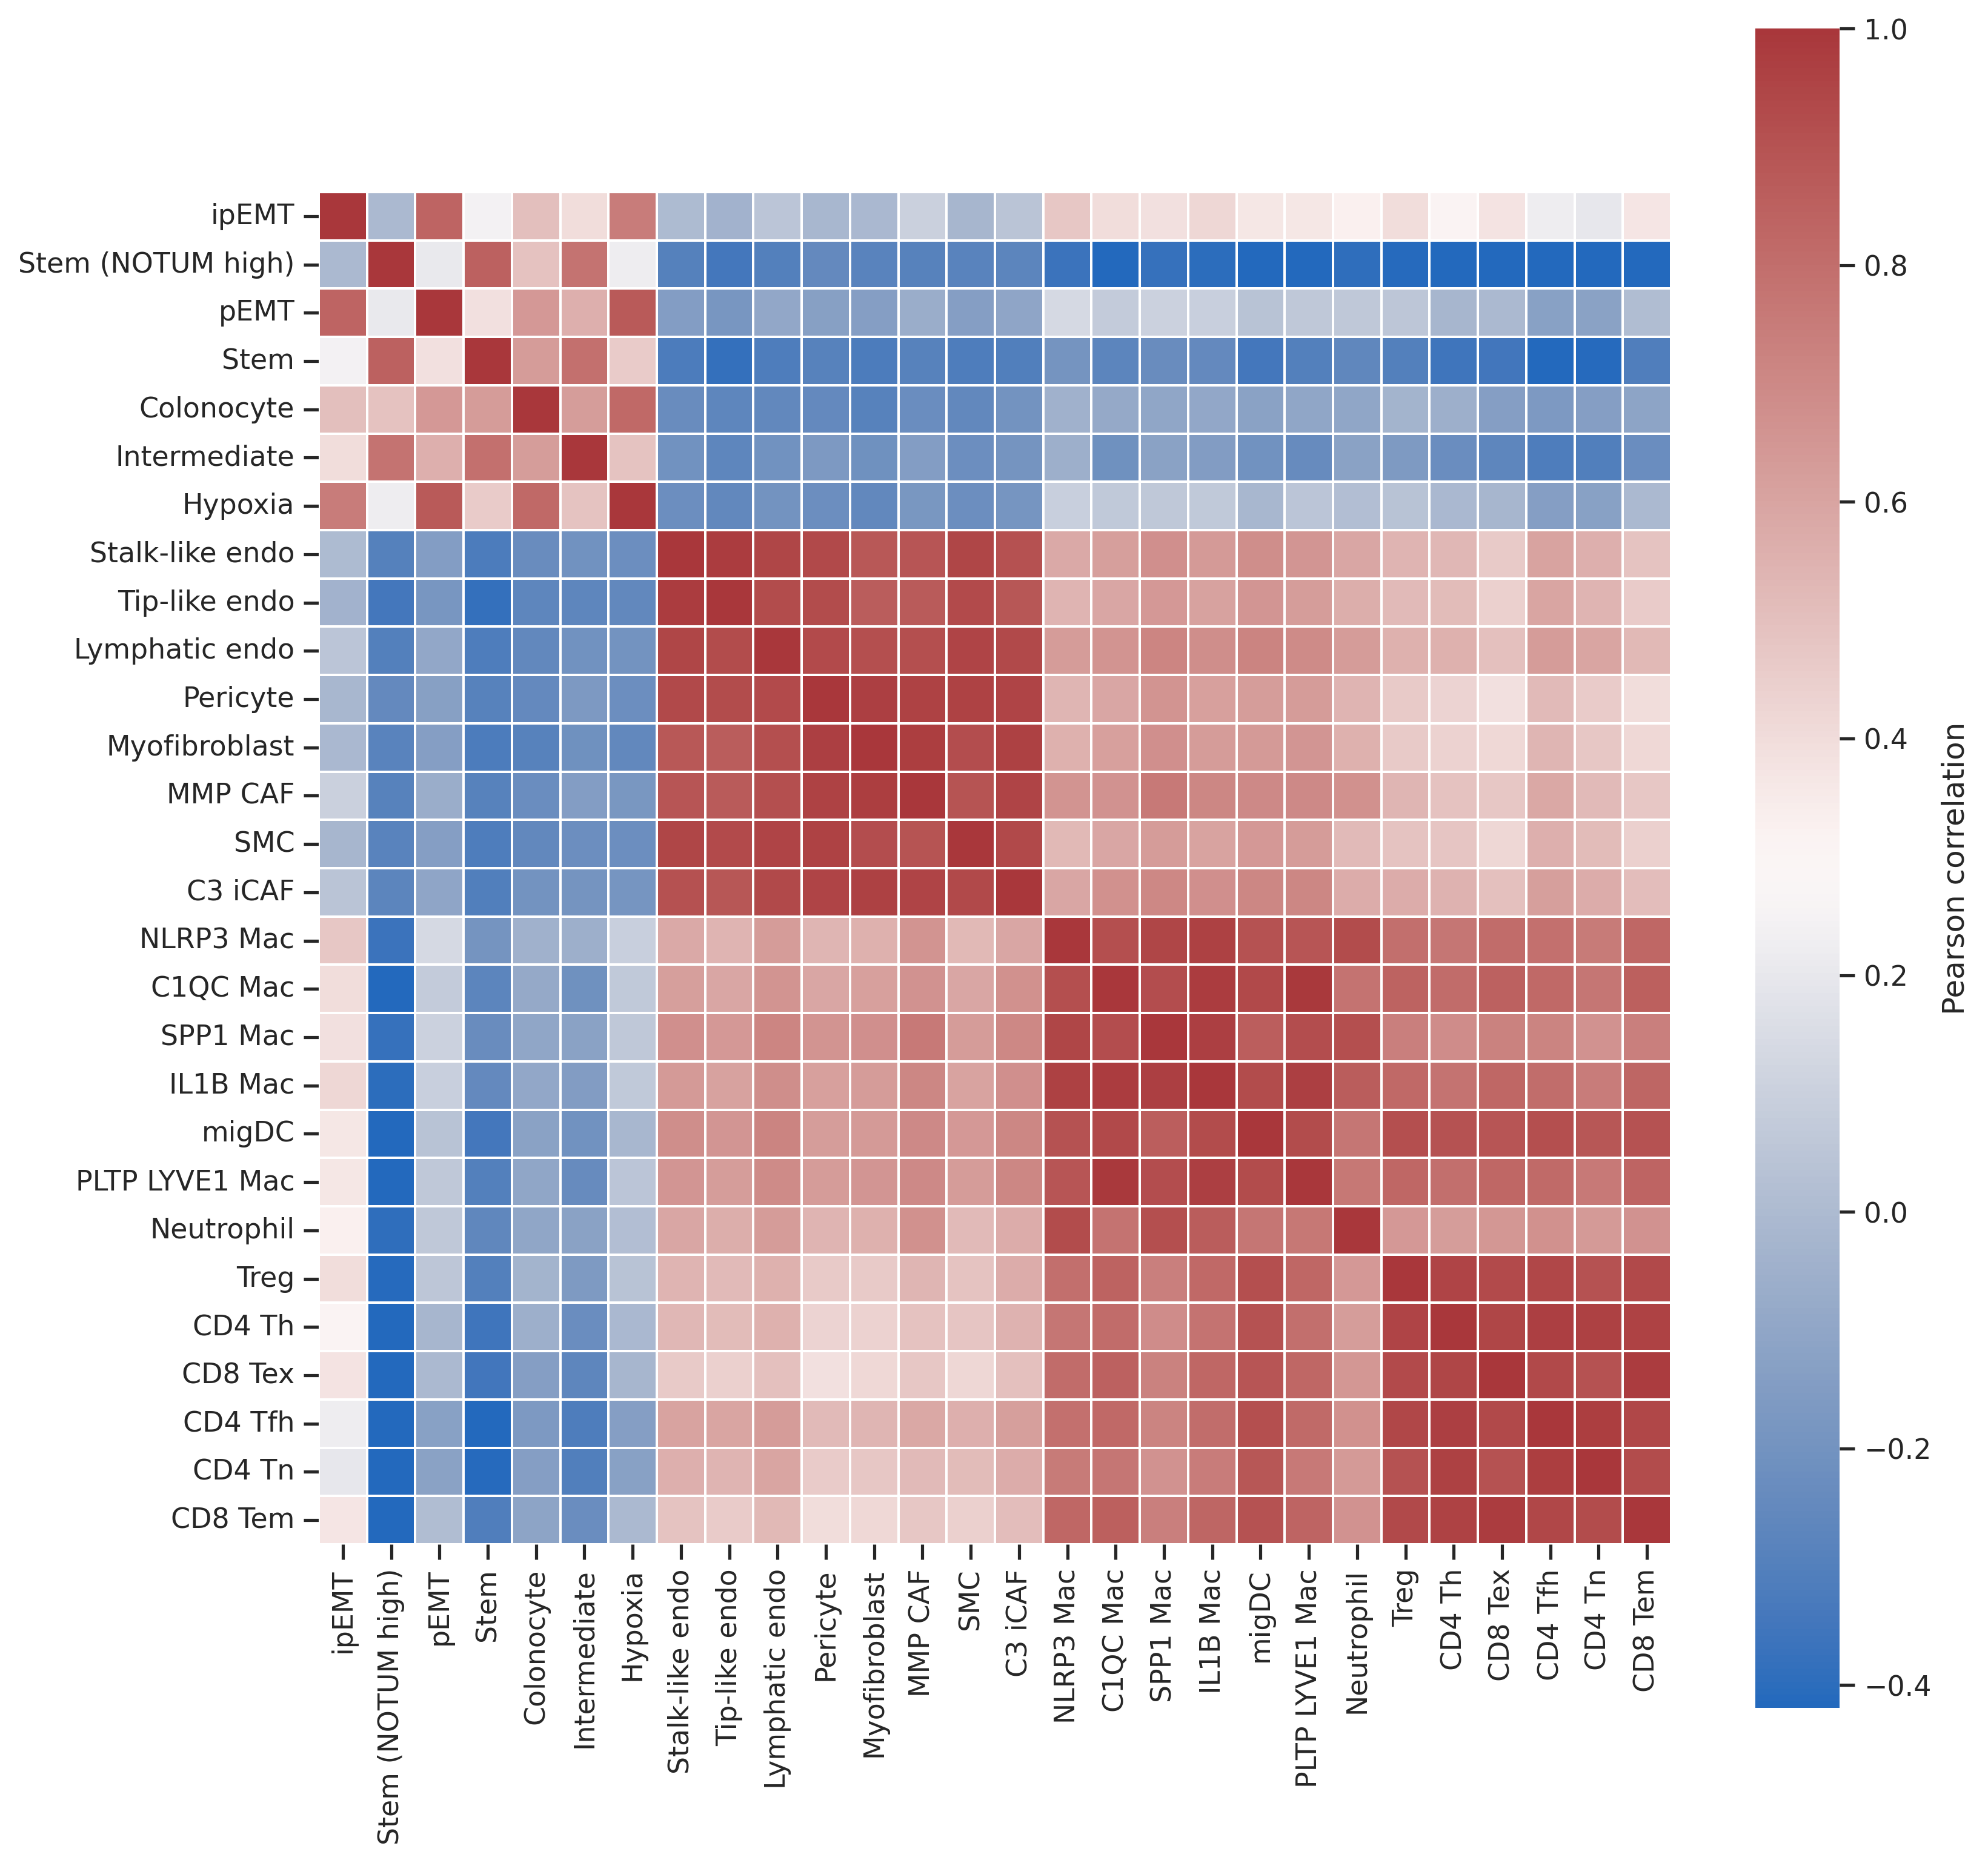

In [25]:
# plot heatmap of correlations:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(12,12))

sns.heatmap(data=corr_df.astype('float'), 
            cmap="vlag", 
            robust=True,
            cbar_kws={'label': 'Pearson correlation'}, 
            square=True, 
            linewidths=.5,
            ax=ax
           )

    
fig.savefig(FIG2SAVE.joinpath(f"TCGA_celltype_signatures_pearson_correlation_heatmap_{genes2consider}_DE_genes_{corr_method}.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [26]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/figures')

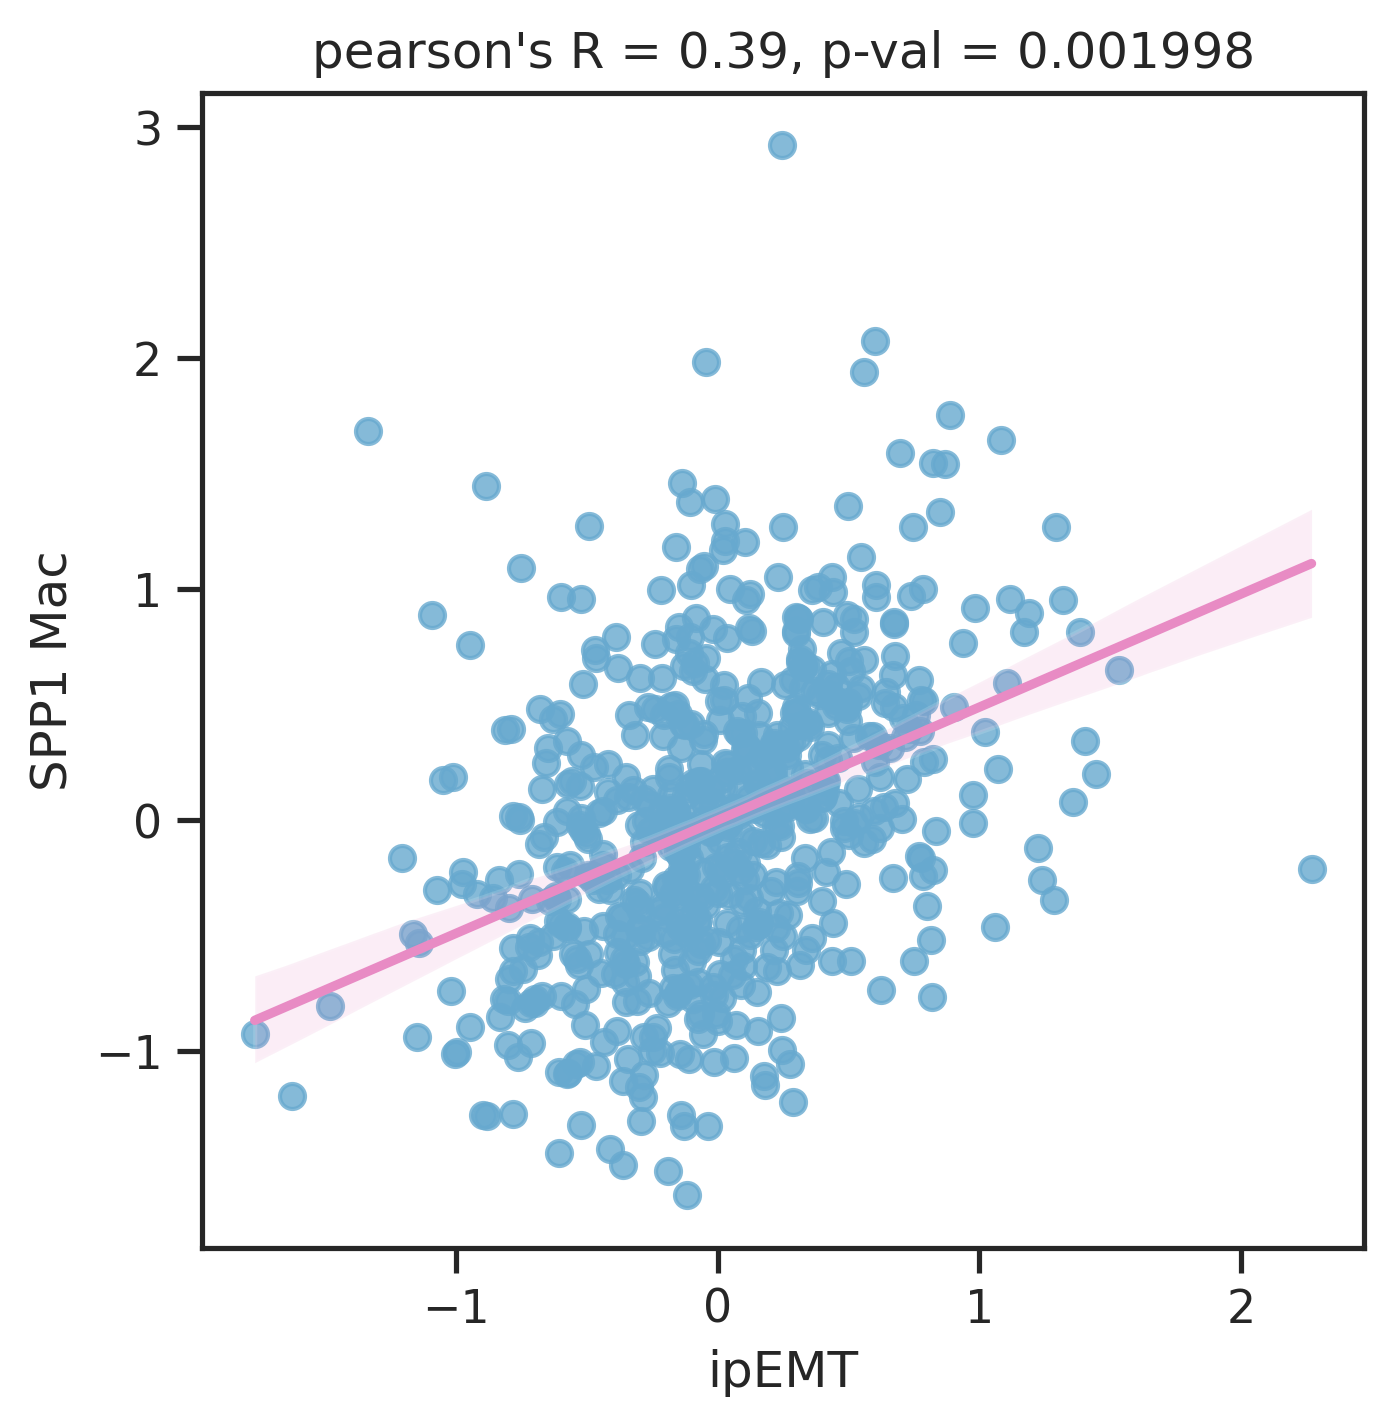

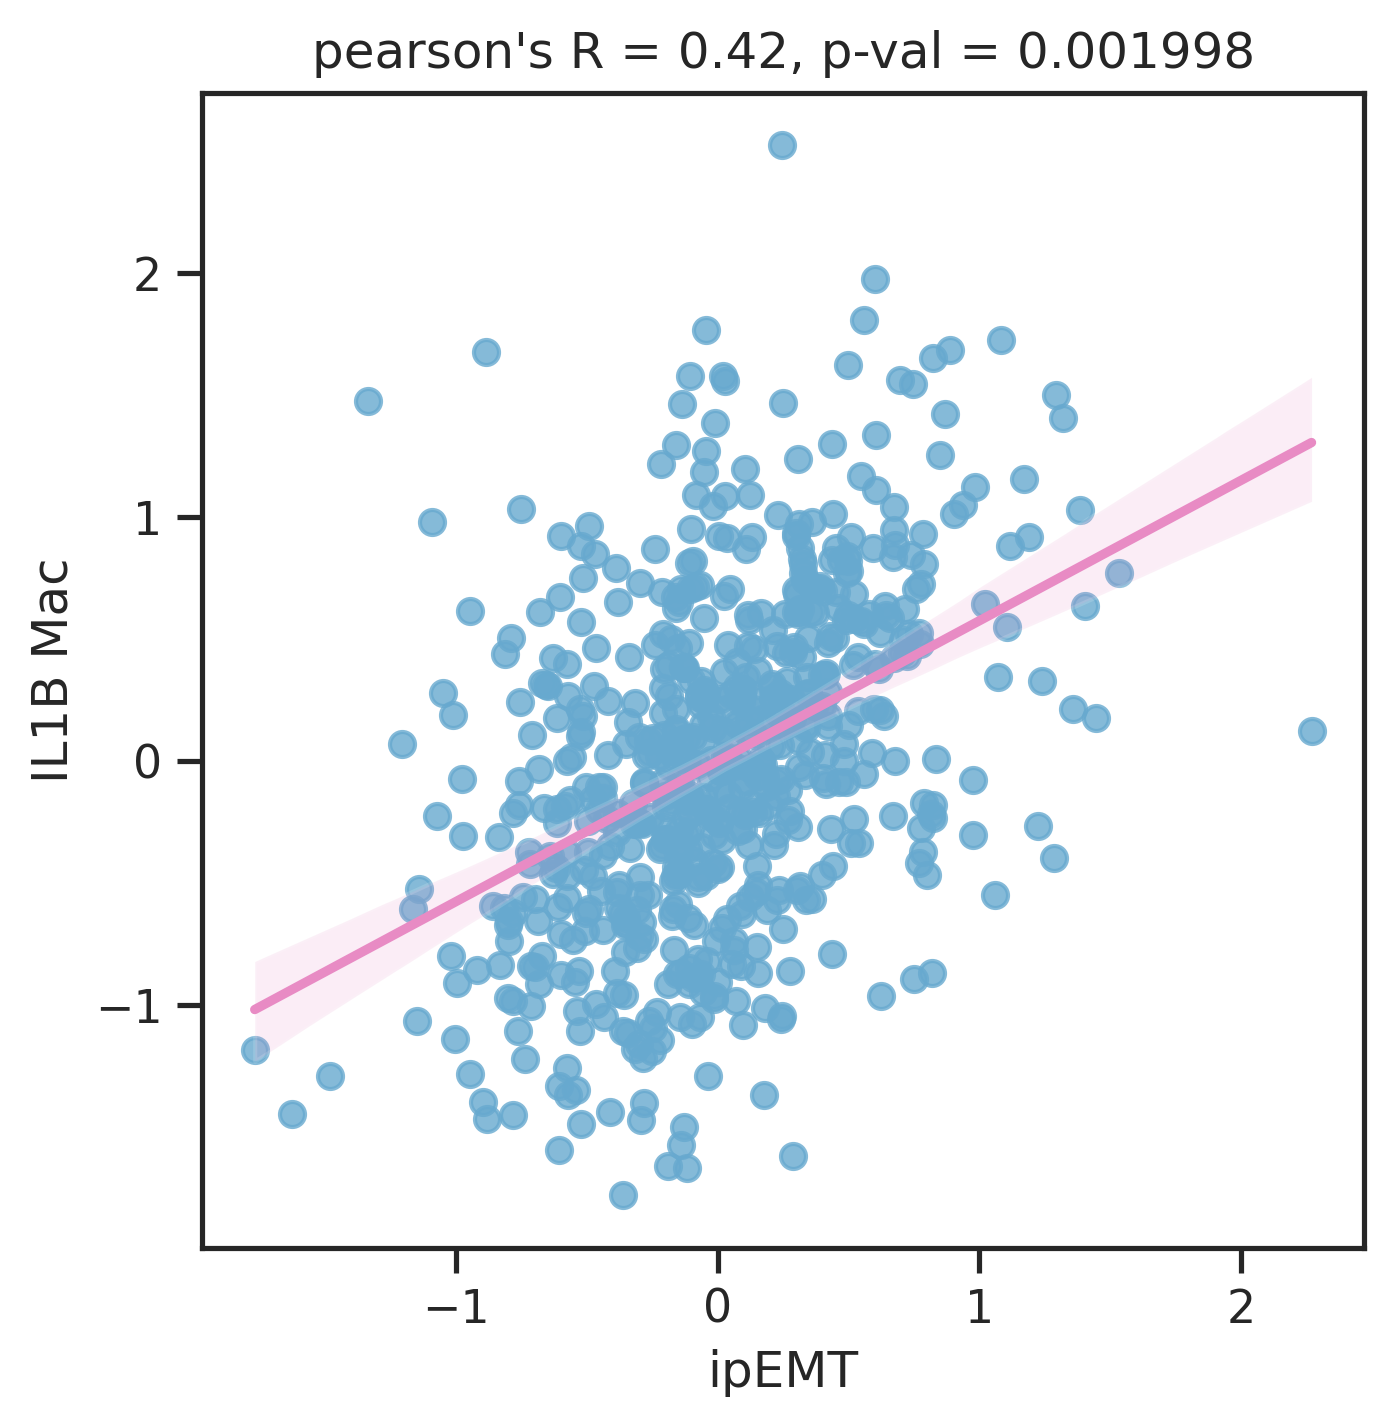

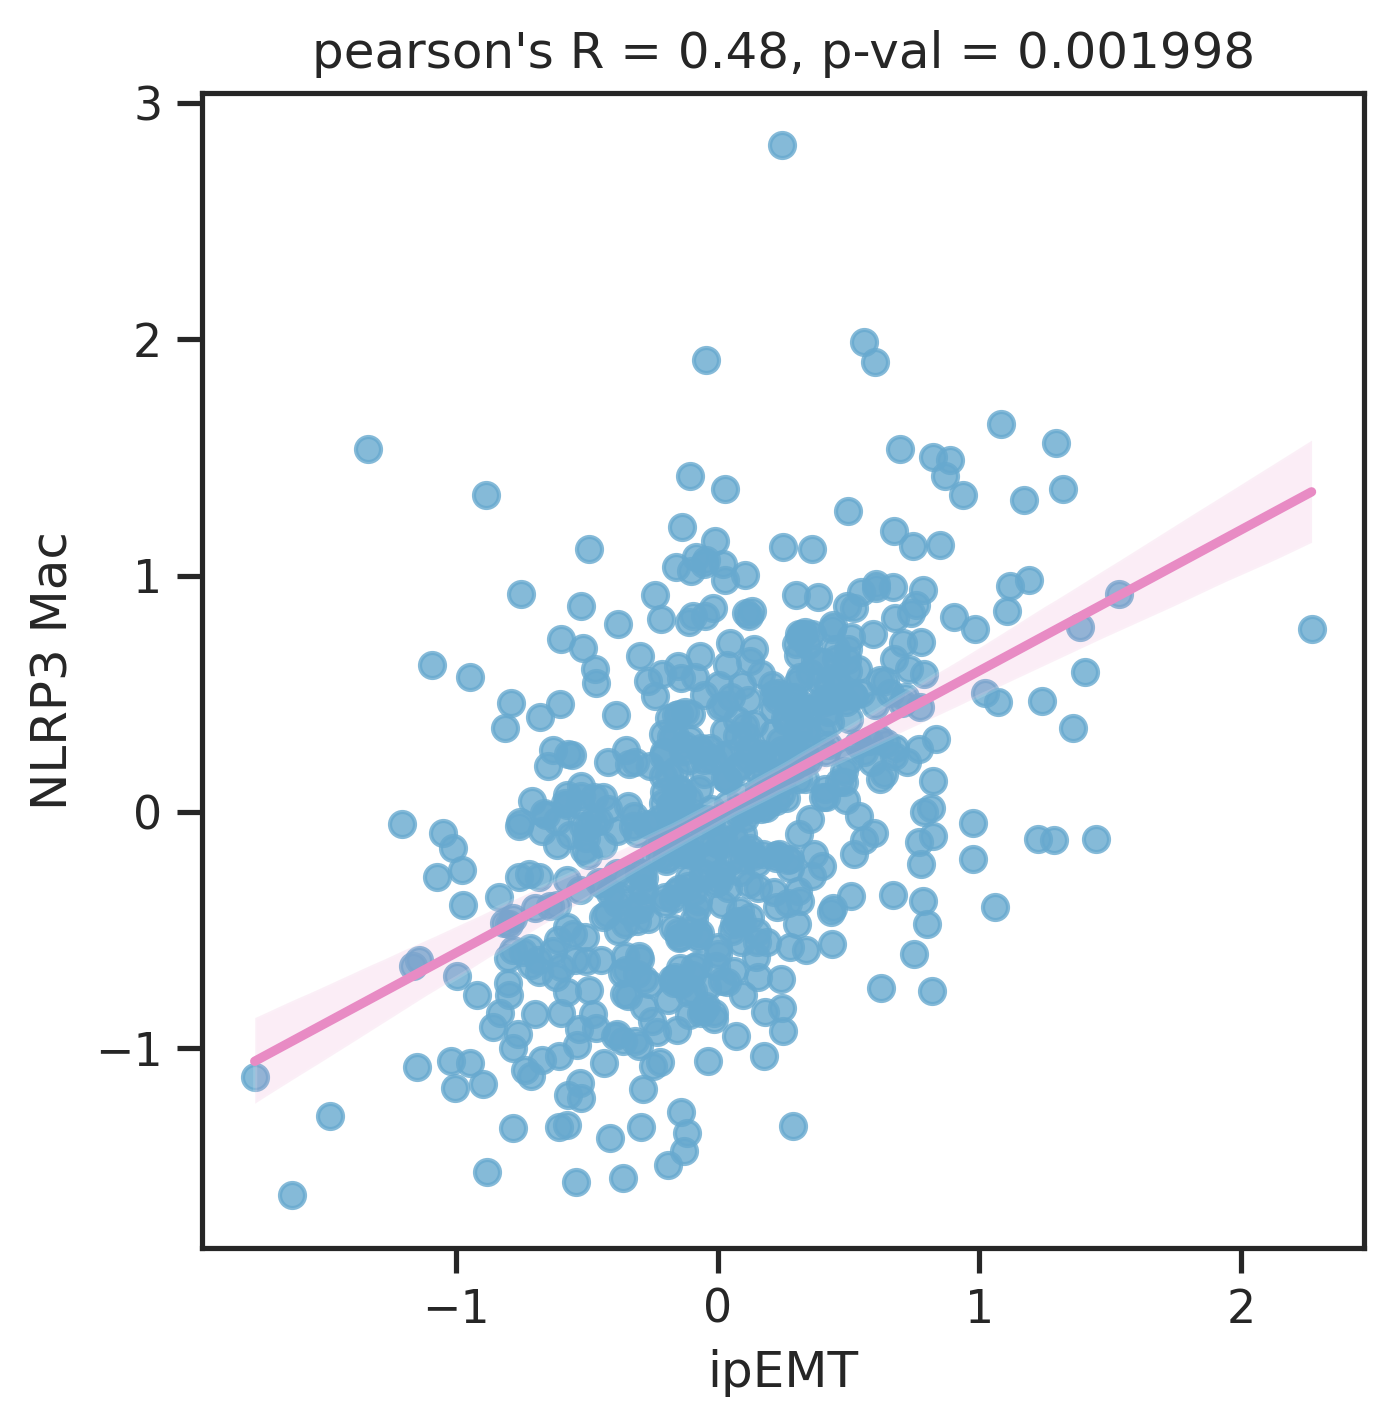

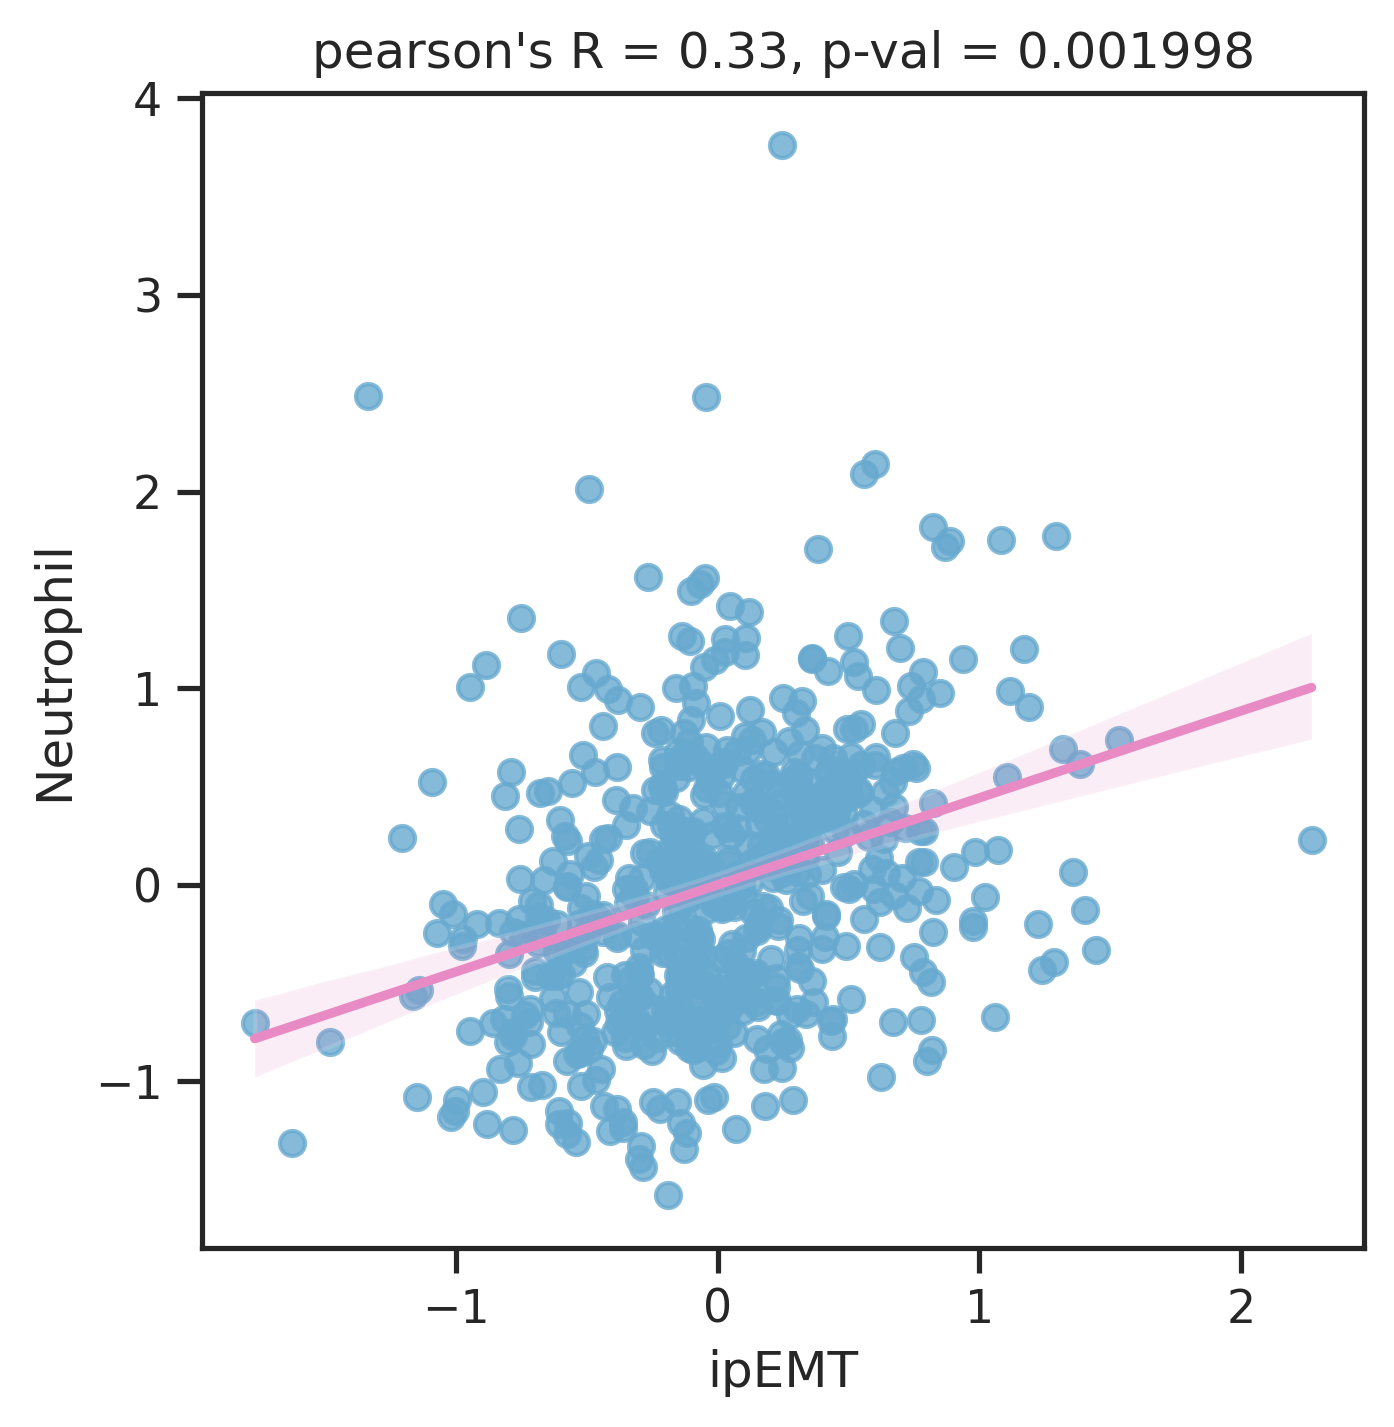

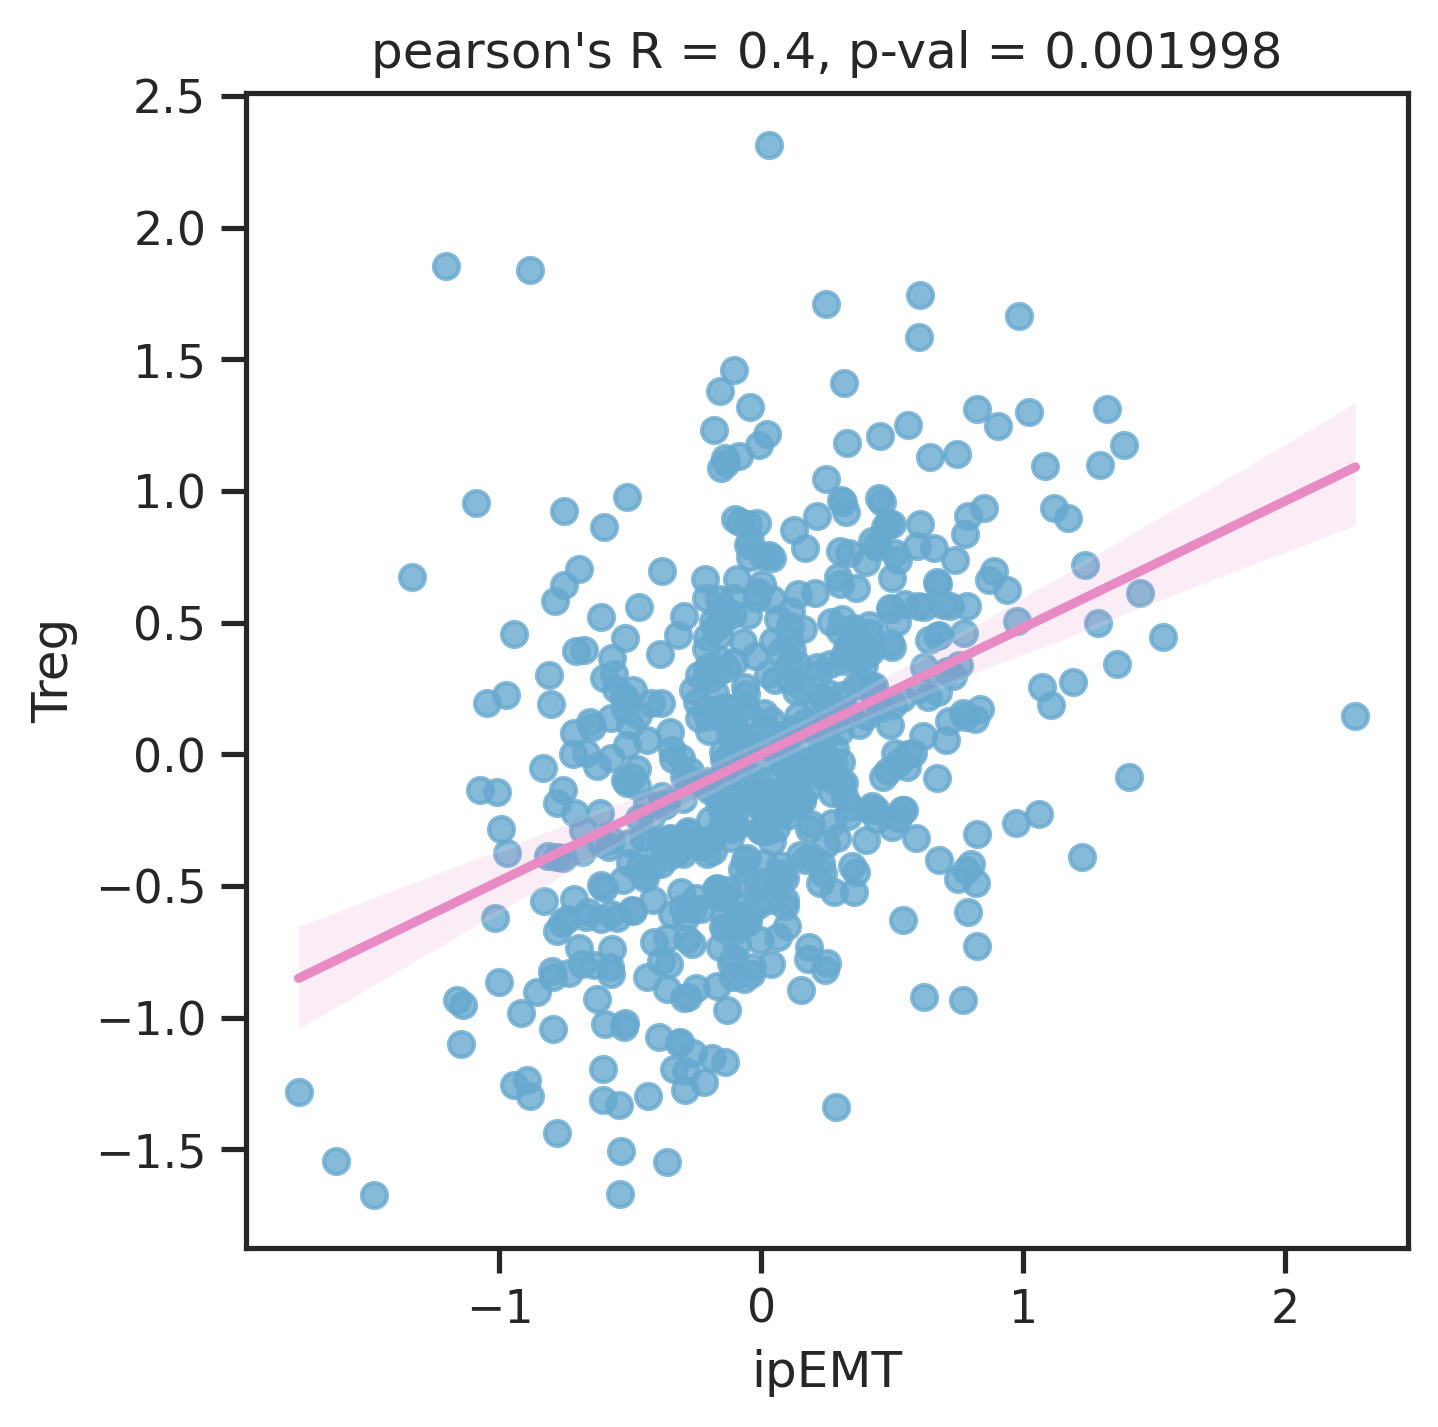

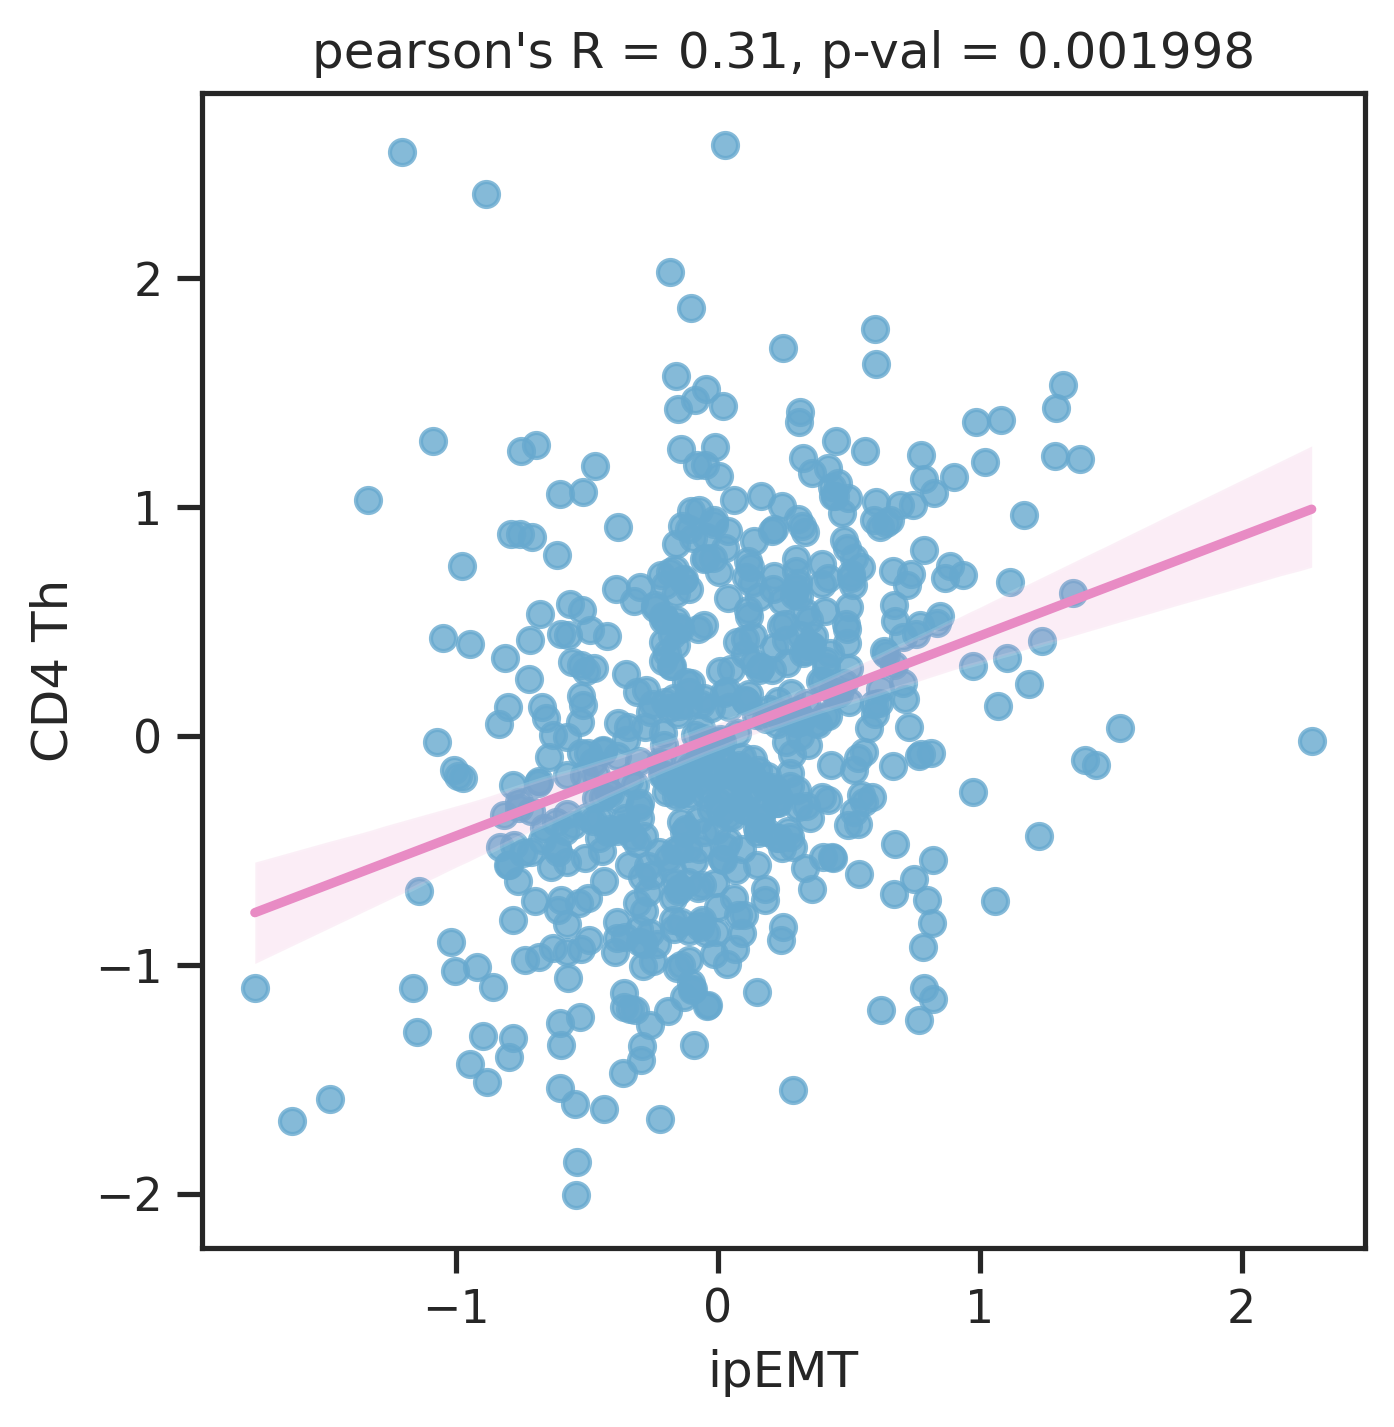

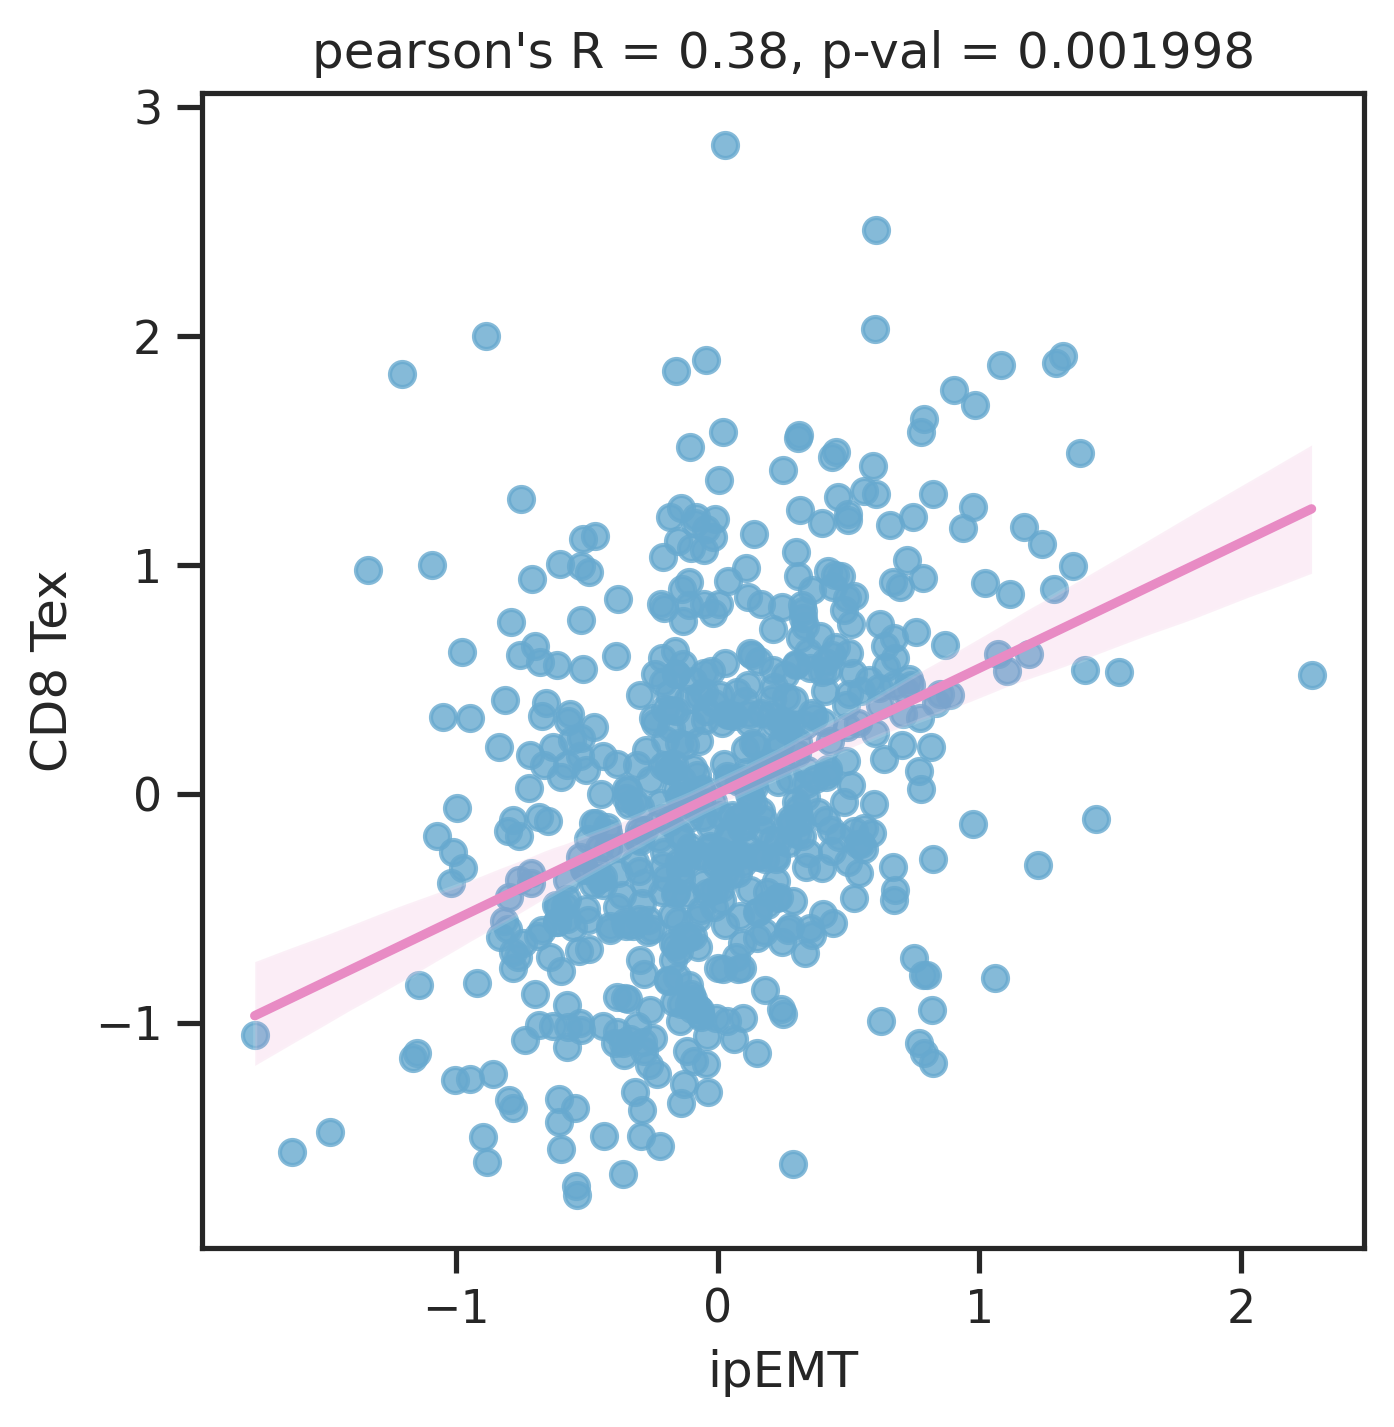

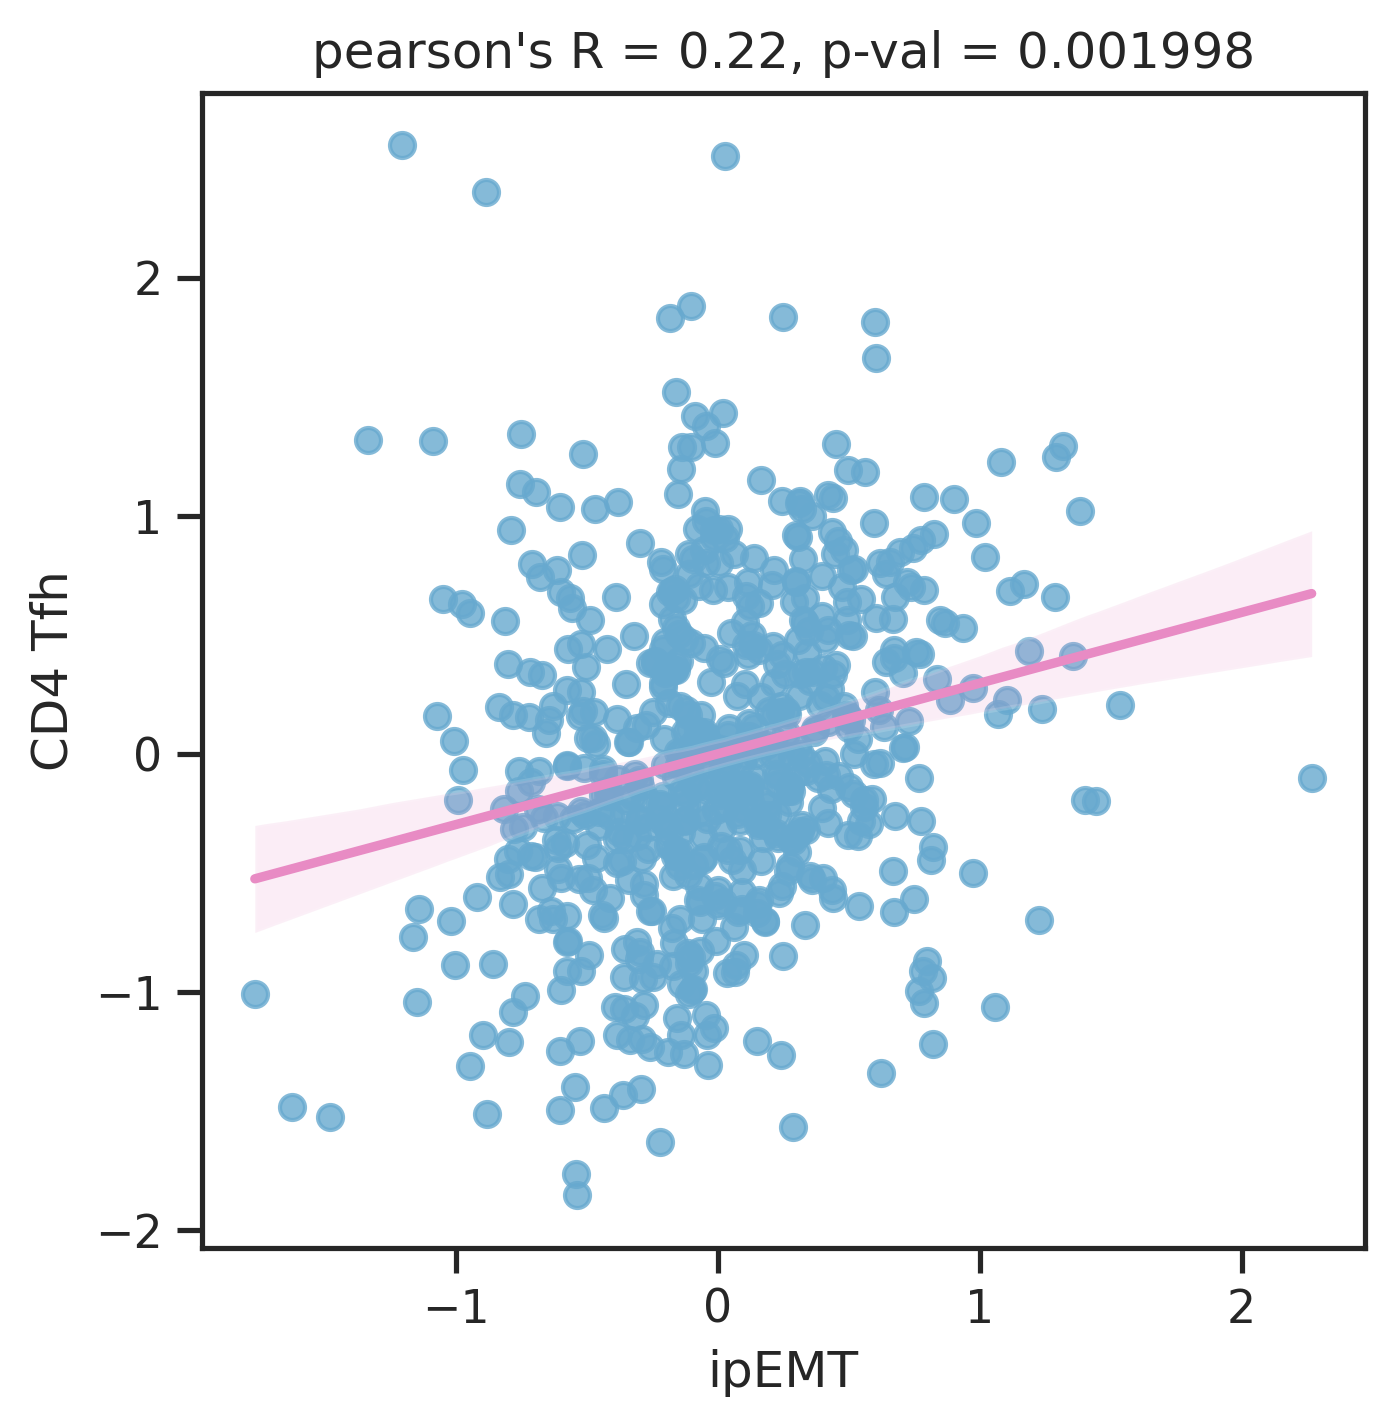

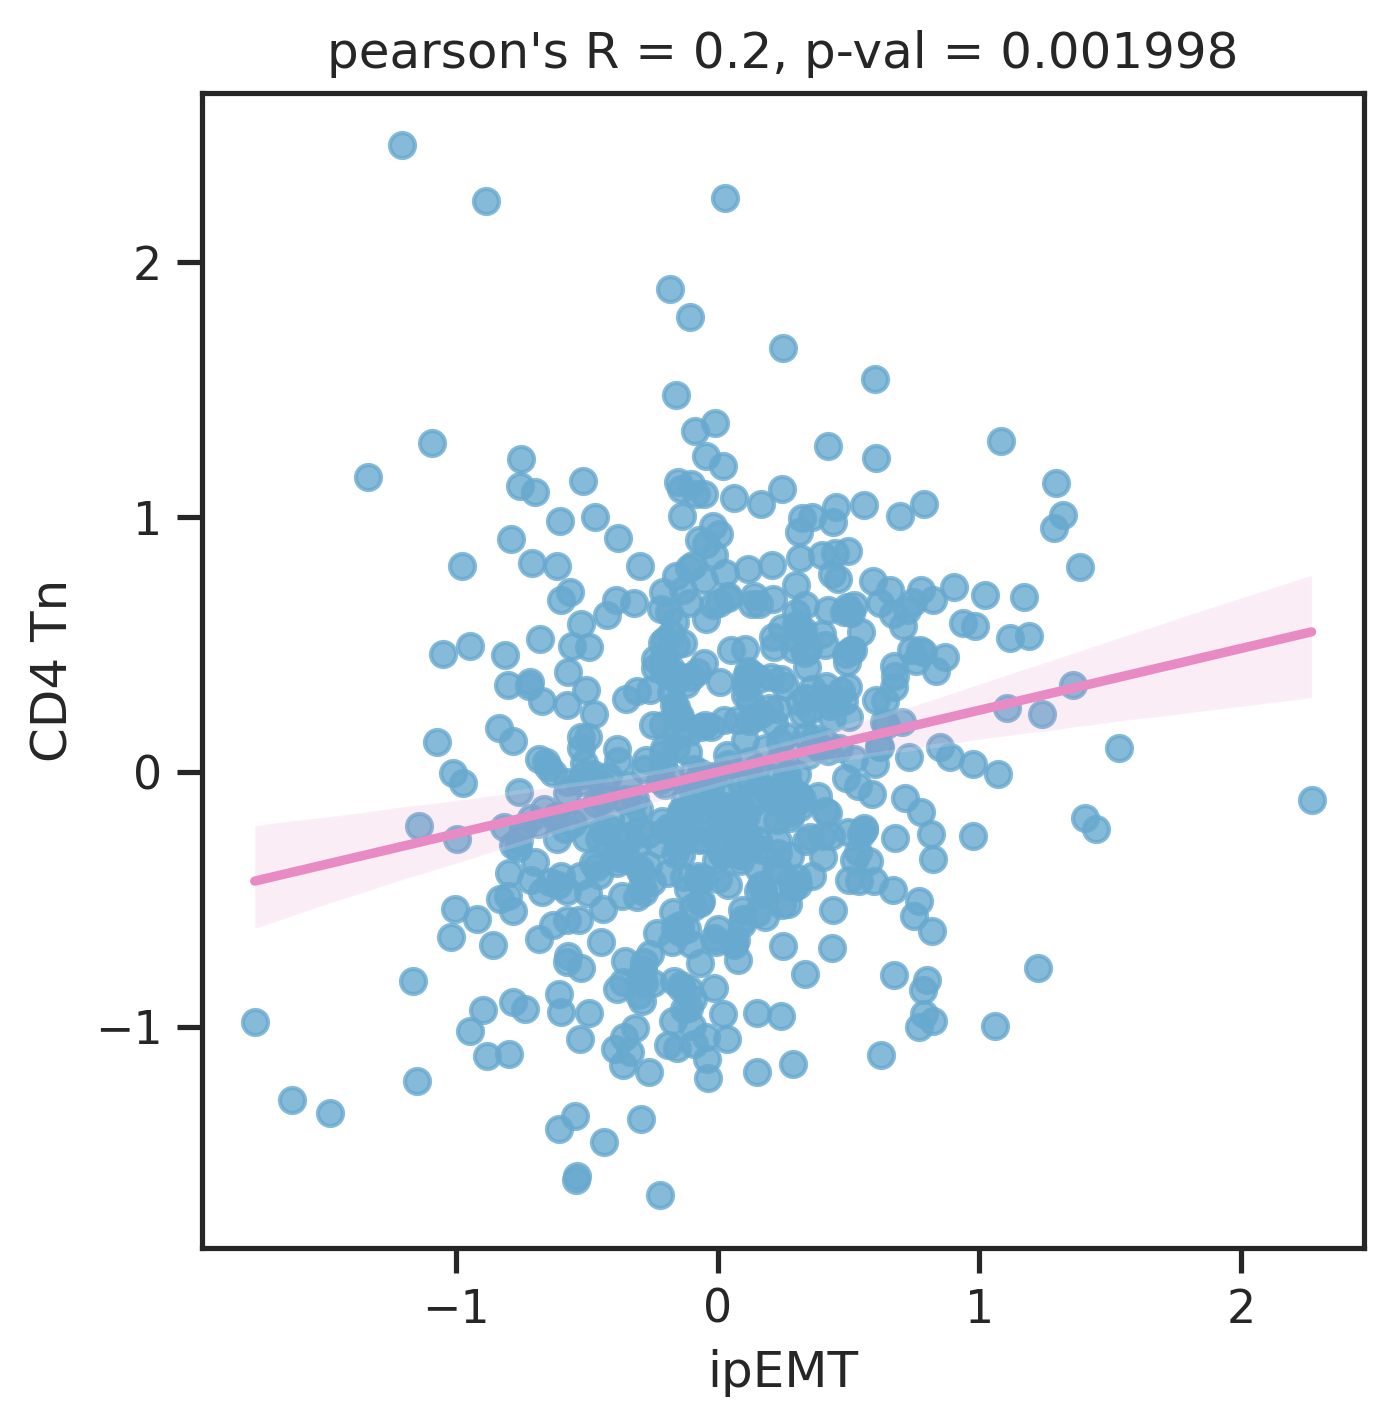

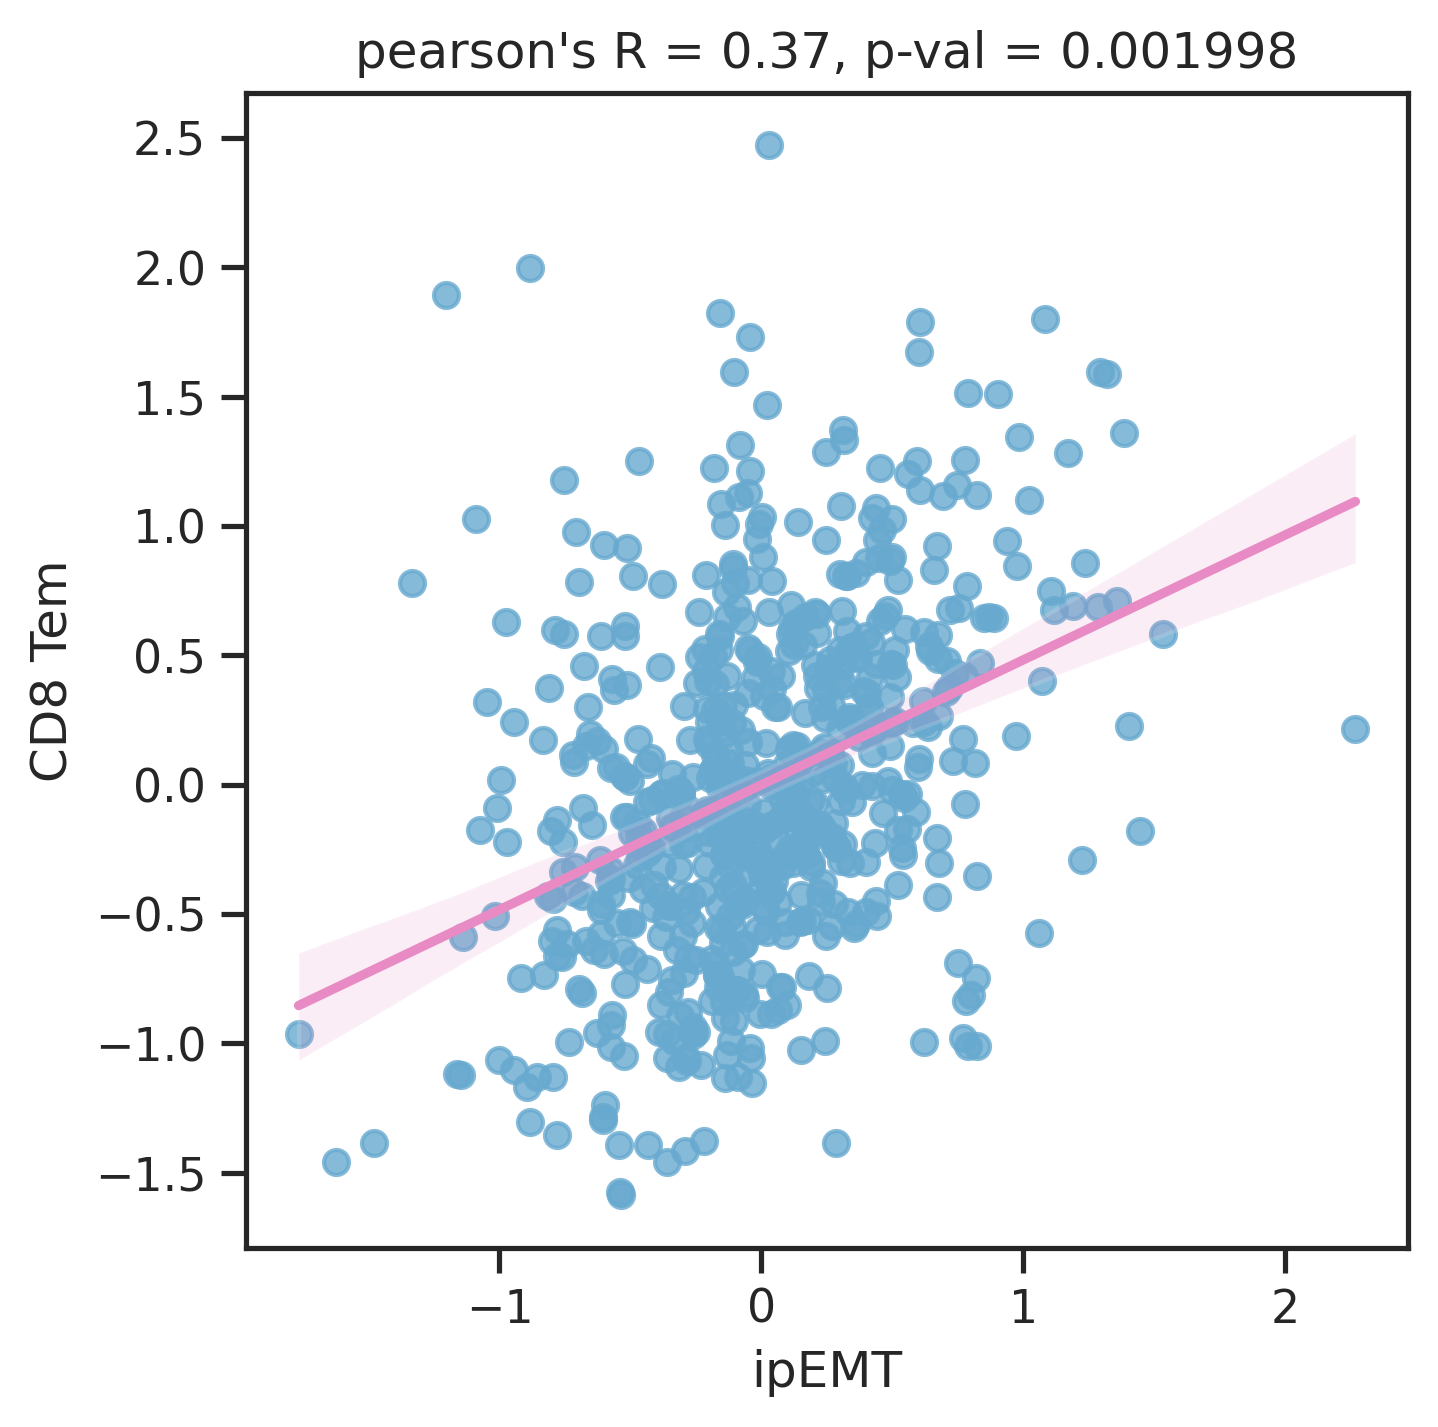

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
DPI=300

combinations_celltypes = [("ipEMT", "SPP1 Mac"), ("ipEMT", "IL1B Mac"), ("ipEMT", "NLRP3 Mac"),
                          ("ipEMT", "Neutrophil"), ("ipEMT", "Treg"), ("ipEMT", "CD4 Th"), ("ipEMT", "CD8 Tex"),
                          ("ipEMT", "CD4 Tfh"), ("ipEMT", "CD4 Tn"), ("ipEMT", "CD8 Tem"),
                         ]

for celltype2plot in combinations_celltypes:

    #celltype2plot = ("ipEMT", "SPP1 Mac")#('ipEMT', 'Stem (NOTUM high)')

    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(5,5))

    sns.regplot(x=tcga_score_df[celltype2plot[0]], y=tcga_score_df[celltype2plot[1]], 
                ax=ax, 
                scatter=True, 
                fit_reg=True, 
                scatter_kws={'color': '#67A9CF'}, 
                line_kws={'color': '#E88BC4'})
    ax.set_title(f"{corr_method}'s R = {round(corr_df.loc[celltype2plot[0], celltype2plot[1]], ndigits=2)}, p-val = {round(pval_df.loc[celltype2plot[0], celltype2plot[1]], ndigits=6)}")
    
    #plt.ylim(-1, 1)
    #plt.xlim(-1, 1)

    fig.savefig(FIG2SAVE.joinpath(f"TCGA_scatterplot_signatures_pearson_correlation_{celltype2plot[0]}_{celltype2plot[1]}_{genes2consider}_DE_genes_{corr_method}.pdf"), 
                dpi=DPI, 
                format="pdf",
                bbox_inches="tight")

In [28]:
genes2consider

40

In [29]:
corr_df

ipEMT Stem (NOTUM high)      pEMT      Stem Colonocyte  \
ipEMT                   1.0         -0.008583  0.836939  0.243814   0.503304   
Stem (NOTUM high) -0.008583               1.0  0.206266  0.848911   0.490002   
pEMT               0.836939          0.206266       1.0  0.386398   0.641108   
Stem               0.243814          0.848911  0.386398       1.0   0.629749   
Colonocyte         0.503304          0.490002  0.641108  0.629749        1.0   
Intermediate        0.39789          0.781005  0.560666  0.789446   0.628133   
Hypoxia            0.745601          0.223328  0.874377  0.461216   0.818012   
Stalk-like endo   -0.002828         -0.295583 -0.146559 -0.322554  -0.231519   
Tip-like endo      -0.04171         -0.342456 -0.183855 -0.385715  -0.265531   
Lymphatic endo     0.046622         -0.301572 -0.096995 -0.315839  -0.258249   
Pericyte          -0.015929         -0.251287 -0.133986 -0.287259  -0.250694   
Myofibroblast     -0.009206         -0.281368 -0.141394 -0.320779  -0.291459   
MMP CAF            0.100783         -0.286955 -0.068946 -0.286588  -0.225518   
SMC               -0.025275         -0.281086 -0.140238 -0.319368  -0.255135   
C3 iCAF            0.041147         -0.272607 -0.106408 -0.307876  -0.202633   
NLRP3 Mac          0.477006         -0.364695  0.138879 -0.194939   -0.04428   
C1QC Mac           0.398616         -0.416039  0.078852 -0.271043  -0.085382   
SPP1 Mac           0.387973         -0.376925   0.10683 -0.235094  -0.098057   
IL1B Mac           0.418042         -0.400284  0.094782 -0.250298  -0.093226   
migDC              0.364949         -0.444245  0.038236 -0.343664  -0.121341   
PLTP LYVE1 Mac     0.363063         -0.428297  0.061522 -0.298409  -0.101885   
Neutrophil         0.327184         -0.393545  0.061776 -0.258761  -0.101914   
Treg               0.400229         -0.408282  0.053651 -0.298601   -0.03211   
CD4 Th             0.310483         -0.434982 -0.024041 -0.352767  -0.056556   
CD8 Tex            0.377548         -0.484378 -0.008233 -0.349924  -0.141398   
CD4 Tfh            0.221874           -0.4987 -0.128986 -0.425469  -0.168236   
CD4 Tn              0.19909         -0.459885 -0.122689 -0.410714  -0.138881   
CD8 Tem            0.371827         -0.435041  0.007906 -0.310939  -0.109548   

                  Intermediate   Hypoxia Stalk-like endo Tip-like endo  \
ipEMT                  0.39789  0.745601       -0.002828      -0.04171   
Stem (NOTUM high)     0.781005  0.223328       -0.295583     -0.342456   
pEMT                  0.560666  0.874377       -0.146559     -0.183855   
Stem                  0.789446  0.461216       -0.322554     -0.385715   
Colonocyte            0.628133  0.818012       -0.231519     -0.265531   
Intermediate               1.0  0.487059       -0.206413      -0.26408   
Hypoxia               0.487059       1.0       -0.222814     -0.255916   
Stalk-like endo      -0.206413 -0.222814             1.0      0.981494   
Tip-like endo         -0.26408 -0.255916        0.981494           1.0   
Lymphatic endo       -0.208558   -0.1999        0.949689       0.92279   
Pericyte             -0.169106 -0.224777        0.936404      0.924962   
Myofibroblast          -0.2138 -0.253318        0.878365      0.865991   
MMP CAF              -0.143135 -0.179933        0.890204      0.871196   
SMC                  -0.220406 -0.224641        0.945212      0.929642   
C3 iCAF               -0.19441 -0.187295        0.910604      0.883657   
NLRP3 Mac            -0.057629  0.094068        0.579789       0.54413   
C1QC Mac             -0.211867   0.06509        0.621393      0.592104   
SPP1 Mac             -0.124571  0.060817        0.673427      0.643571   
IL1B Mac             -0.152737  0.063181        0.639356      0.608902   
migDC                -0.205366 -0.014623         0.68388      0.653491   
PLTP LYVE1 Mac       -0.238822  0.046629        0.651739      0.626072   
Neutrophil           -0.123648  0.014772        0.592641       0.56664   

In [30]:
pval_df

ipEMT Stem (NOTUM high)      pEMT      Stem Colonocyte  \
ipEMT              0.001998          0.891109  0.001998  0.001998   0.001998   
Stem (NOTUM high)  0.795205          0.001998  0.001998  0.001998   0.001998   
pEMT               0.001998          0.001998  0.001998  0.001998   0.001998   
Stem               0.001998          0.001998  0.001998  0.001998   0.001998   
Colonocyte         0.001998          0.001998  0.001998  0.001998   0.001998   
Intermediate       0.001998          0.001998  0.001998  0.001998   0.001998   
Hypoxia            0.001998          0.001998  0.001998  0.001998   0.001998   
Stalk-like endo    0.917083          0.001998  0.001998  0.001998   0.001998   
Tip-like endo      0.261738          0.001998  0.001998  0.001998   0.001998   
Lymphatic endo     0.255744          0.001998  0.015984  0.001998   0.001998   
Pericyte           0.679321          0.001998  0.005994  0.001998   0.001998   
Myofibroblast      0.779221          0.001998  0.001998  0.001998   0.001998   
MMP CAF            0.021978          0.001998  0.087912  0.001998   0.001998   
SMC                0.485514          0.001998  0.003996  0.001998   0.001998   
C3 iCAF            0.325674          0.001998  0.011988  0.001998   0.001998   
NLRP3 Mac          0.001998          0.001998  0.001998  0.001998   0.275724   
C1QC Mac           0.001998          0.001998  0.033966  0.001998   0.025974   
SPP1 Mac           0.001998          0.001998  0.011988  0.001998    0.00999   
IL1B Mac           0.001998          0.001998   0.01998  0.001998   0.013986   
migDC              0.001998          0.001998  0.331668  0.001998   0.001998   
PLTP LYVE1 Mac     0.001998          0.001998  0.113886  0.001998    0.00999   
Neutrophil         0.001998          0.001998  0.121878  0.001998   0.007992   
Treg               0.001998          0.001998  0.207792  0.001998   0.401598   
CD4 Th             0.001998          0.001998  0.565435  0.001998   0.167832   
CD8 Tex            0.001998          0.001998  0.841159  0.001998   0.001998   
CD4 Tfh            0.001998          0.001998  0.005994  0.001998   0.001998   
CD4 Tn             0.001998          0.001998  0.007992  0.001998   0.001998   
CD8 Tem            0.001998          0.001998  0.825175  0.001998   0.003996   

                  Intermediate   Hypoxia Stalk-like endo Tip-like endo  \
ipEMT                 0.001998  0.001998        0.861139      0.265734   
Stem (NOTUM high)     0.001998  0.001998        0.001998      0.001998   
pEMT                  0.001998  0.001998        0.001998      0.001998   
Stem                  0.001998  0.001998        0.001998      0.001998   
Colonocyte            0.001998  0.001998        0.001998      0.001998   
Intermediate          0.001998  0.001998        0.001998      0.001998   
Hypoxia               0.001998  0.001998        0.001998      0.001998   
Stalk-like endo       0.001998  0.001998        0.001998      0.001998   
Tip-like endo         0.001998  0.001998        0.001998      0.001998   
Lymphatic endo        0.001998  0.001998        0.001998      0.001998   
Pericyte              0.001998  0.001998        0.001998      0.001998   
Myofibroblast         0.001998  0.001998        0.001998      0.001998   
MMP CAF               0.003996  0.001998        0.001998      0.001998   
SMC                   0.001998  0.001998        0.001998      0.001998   
C3 iCAF               0.001998  0.001998        0.001998      0.001998   
NLRP3 Mac             0.131868   0.02997        0.001998      0.001998   
C1QC Mac              0.001998  0.093906        0.001998      0.001998   
SPP1 Mac              0.001998  0.121878        0.001998      0.001998   
IL1B Mac              0.001998   0.11988        0.001998      0.001998   
migDC                 0.001998  0.715285        0.001998      0.001998   
PLTP LYVE1 Mac        0.001998  0.223776        0.001998      0.001998   
Neutrophil            0.001998  0.721279        0.001998      0.001998   

In [31]:
for i in zip((corr_df, pval_df), ("corr", "pval")):
    print(i[1])

corr
pval


In [32]:
from scipy import stats

columns_subset = ['ipEMT', 'pEMT', 'Stem', 'Stem (NOTUM high)', 'NLRP3 Mac', 'SPP1 Mac', 
                  'IL1B Mac', 'Neutrophil', 'Treg', 'CD4 Th', 
                  'CD8 Tex', 'CD4 Tfh', 'CD4 Tn', 'CD8 Tem'
                 ]

corr_df = pd.DataFrame(index=columns_subset, columns=columns_subset)
pval_df = pd.DataFrame(index=columns_subset, columns=columns_subset)

for x in columns_subset:
    for y in columns_subset:
        if corr_method ==  "pearson":
            res = stats.pearsonr(tcga_score_df[x], tcga_score_df[y], 
                                 alternative='two-sided',
                                 method=stats.PermutationMethod(n_resamples=1000, random_state=7))
        if corr_method ==  "spearman":
            res = stats.spearmanr(tcga_score_df[x], tcga_score_df[y], 
                                 alternative='two-sided',
                                 )
        
        
        corr_df.loc[x,y] = res[0]
        pval_df.loc[x,y] = res[1]
        

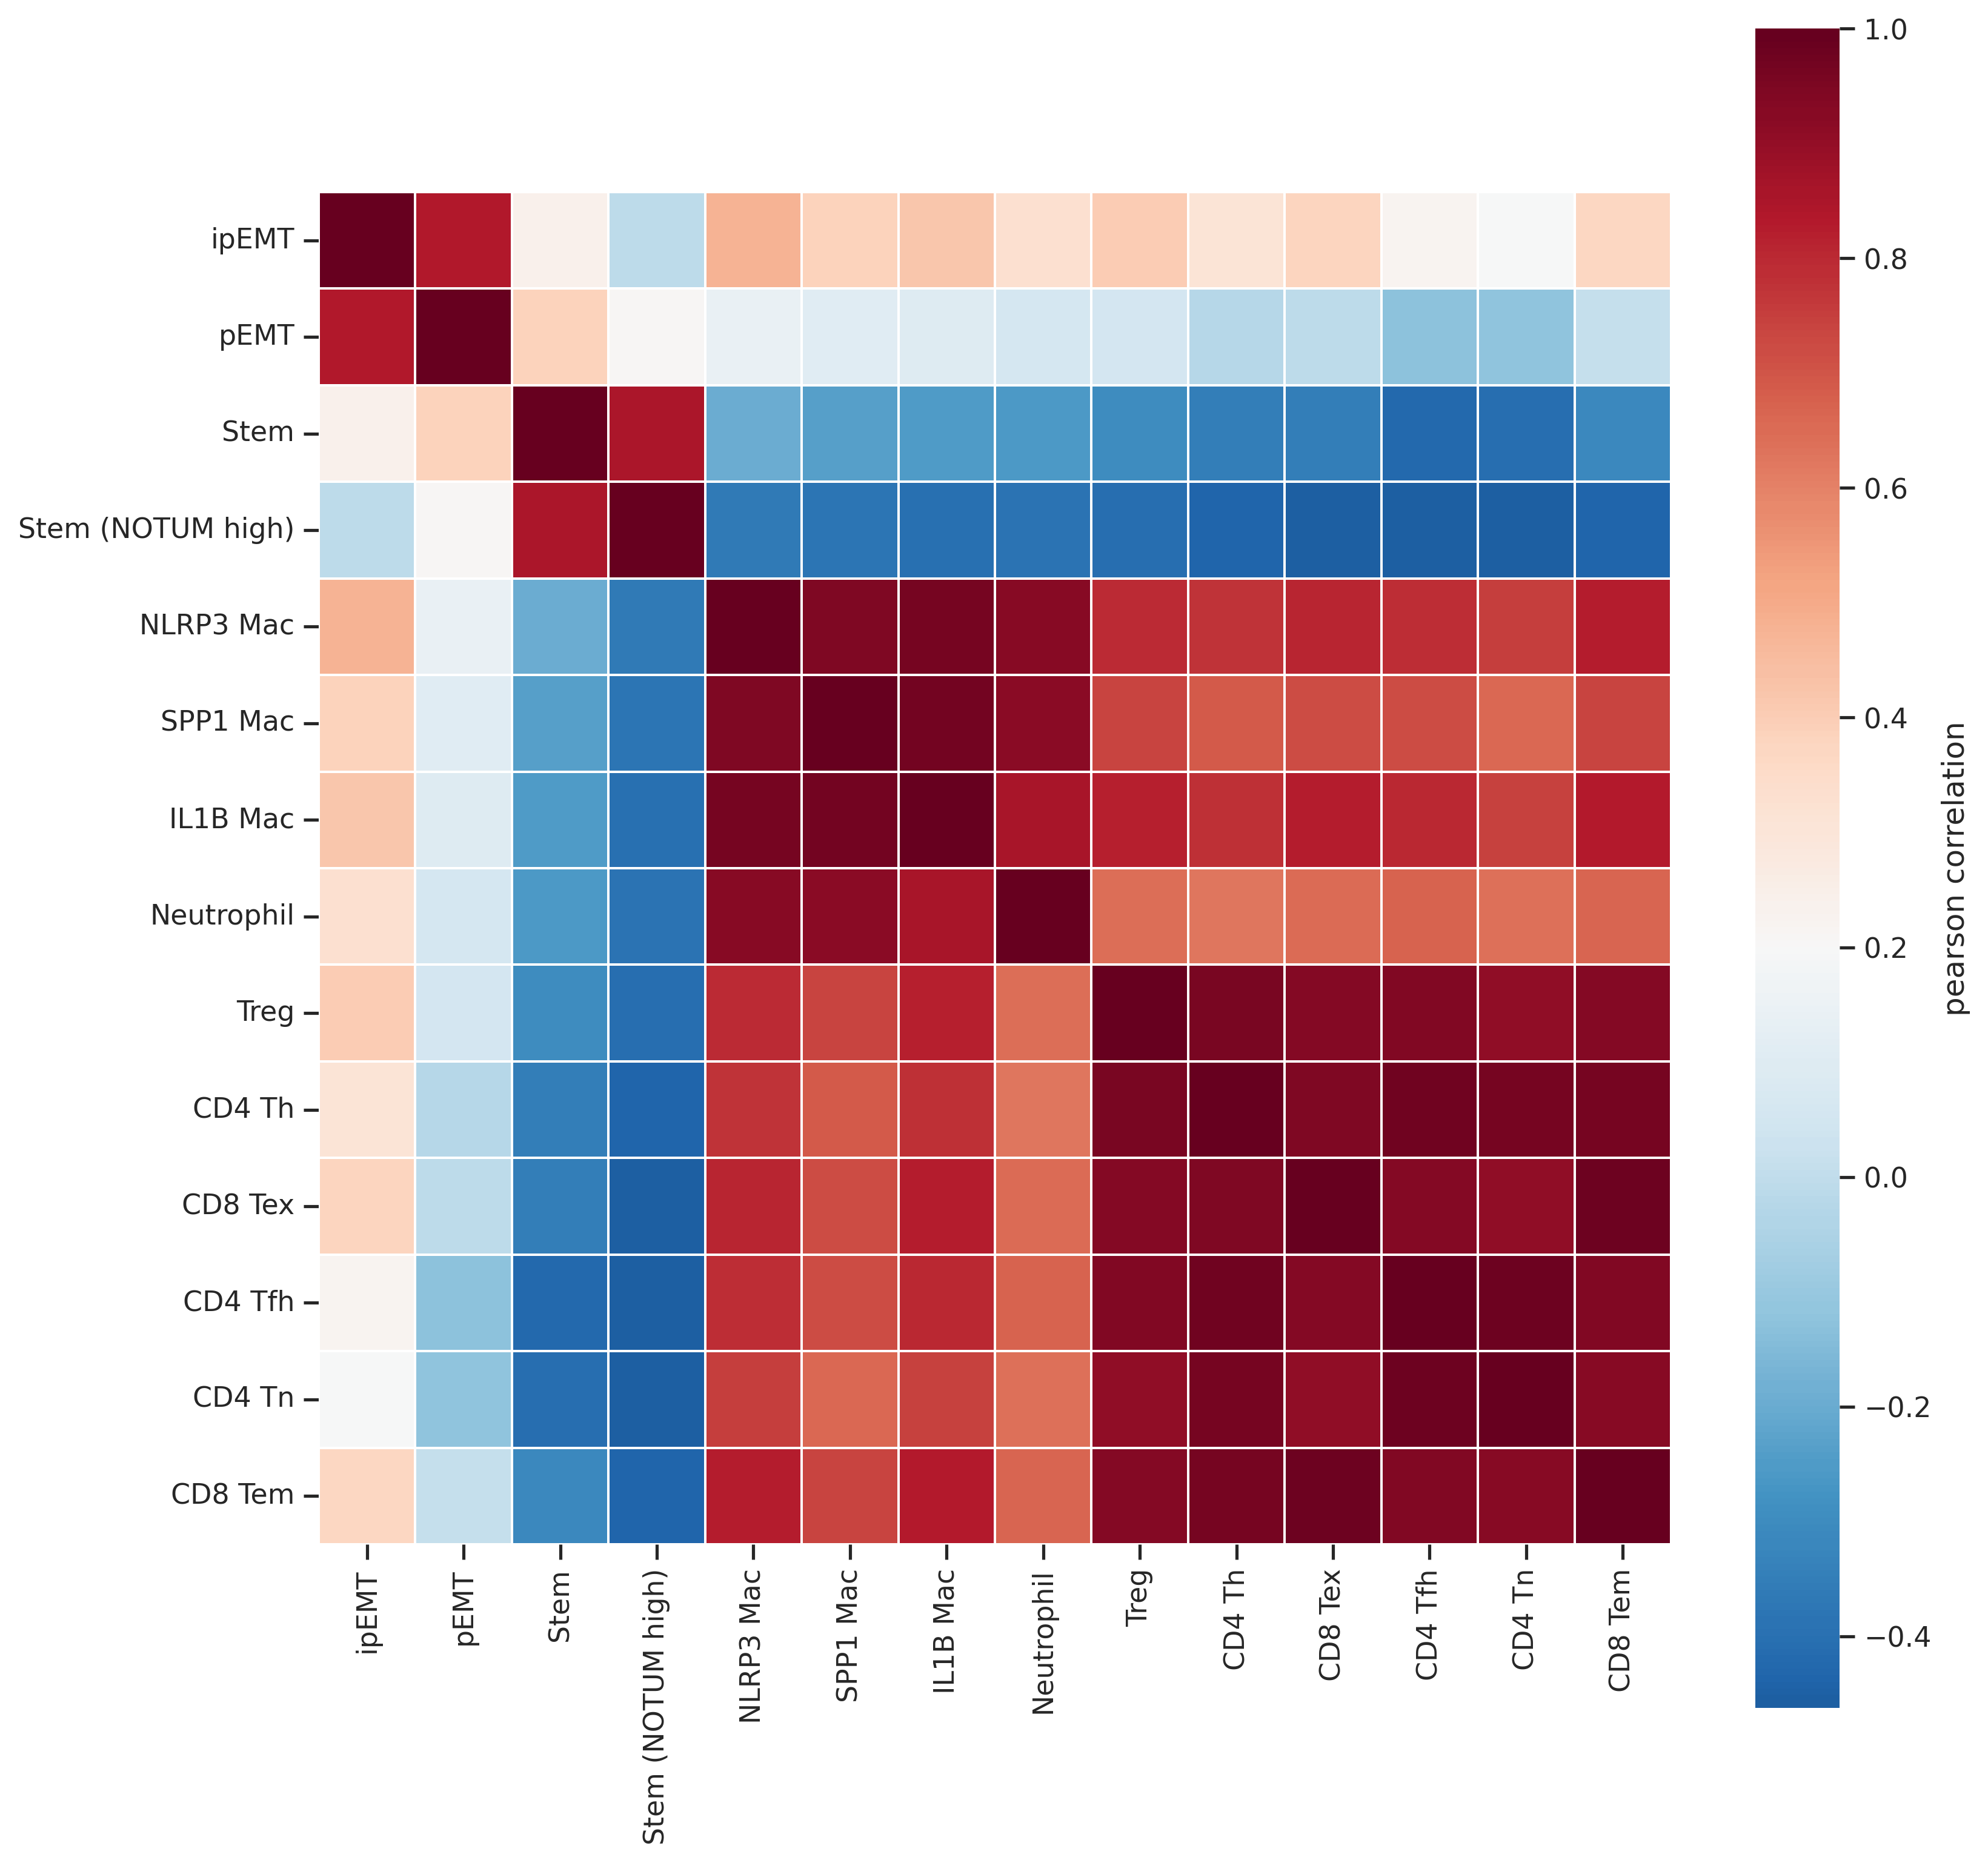

In [33]:
# plot heatmap of correlations:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(12,12))

sns.heatmap(data=corr_df.astype('float'), 
            cmap="RdBu_r", 
            center=0.2,
            robust=True,
            cbar_kws={'label': f'{corr_method} correlation'}, 
            square=True, 
            linewidths=.5,
            ax=ax
           )

    
fig.savefig(FIG2SAVE.joinpath(f"TCGA_celltype_signatures_pearson_correlation_heatmap_{genes2consider}_DE_genes_{corr_method}_RdBu_r_subset_iREC.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [34]:
### save corr_df, pval_df to single excel file
with pd.ExcelWriter(
    path=DIR2SAVE.joinpath(f"TCGA_celltype_signatures_pearson_corr_pvals_{genes2consider}_DE_genes_{corr_method}.xlsx")) as writer:
    for i in zip((corr_df, pval_df), ("corr", "pval")):

        # get celltype of cluster
        # celltype = np.unique(adata[adata.obs['leiden']==cluster,:].obs['cell identity'])[0]

        i[0].to_excel(
            writer, sheet_name=f"{i[1]}"
        )

In [35]:
stats.pearsonr(tcga_score_df['ipEMT'], 
               tcga_score_df['SPP1 Mac'], 
               alternative='two-sided', 
               method=stats.PermutationMethod(n_resamples=10000, random_state=7))

PearsonRResult(statistic=0.38797307108388845, pvalue=0.00019998000199980003)

In [36]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt')

In [37]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/figures')

rsync -aP hfx941@login.hpc.qmul.ac.uk:/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/TCGA_celltype_signatures_pearson_corr_pvals_40_DE_genes.xlsx /Users/nasrine/Downloads/my_analysis/scRNAseq/pCRC/A5_final_merged_annot